# Business Understanding

**Problem**

Sebuah lending company memiliki 12% kreditur yang terancam default. Masalah tersebut dapat menyebabkan kerugian 799.096.444. Perusahaan ingin memberikan limit kredit, bunga dan term yang tepat untuk meminimalisir kerugian. ID/X Partners berkolaborasi dengan perusahaan tersebut untuk membangun model yang dapat memprediksi credit risk

**Business Metrics**

    1. Jumlah default creditors
    2. Jumlah kerugian yang diakibatkan oleh default loan
    
**Goals**

Model yang dapat memberikan credit scoring untuk membantu lending company menentukan diterima atau ditolak pinjaman yang diajukan. Selain itu, model ini dapat menjadi pertimbangan lending company untuk memberikan jumlah bunga, kredit limit dan jangka waktu peminjaman.



# Data Understanding

## Define Target

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
warnings.filterwarnings("ignore")

In [369]:
df = pd.read_csv('loan_data_2007_2014.csv')

In [370]:
def preprocessing(df):
    """"
    Objective :
    Function for preprocessing data, known missing, duplicated values and basic stastics every column in dataframe and duplicated row
    df is dataframe
    """
    try:
        import pandas as pd
        variables = pd.DataFrame(columns=['Variable','Number of unique values','Percent of Null(%)','Number of Null','Type','Values'])
        for i, var in enumerate(df.columns):
            variables.loc[i] = [var, df[var].nunique(),df[var].isnull().sum()/df.shape[0]*100,df[var].isnull().sum(),df[var].dtypes,df[var].unique()]
        return (variables.set_index('Variable'))
    except:
        print('ada kesalahan penginputan')

In [371]:
preprocessing(df)

,Number of unique values,Percent of Null(%),Number of Null,Type,Values
Variable,,,,,
Unnamed: 0,466285,0.00,0,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
id,466285,0.00,0,int64,"[1077501, 1077430, 1077175, 1076863, 1075358, ..."
member_id,466285,0.00,0,int64,"[1296599, 1314167, 1313524, 1277178, 1311748, ..."
loan_amnt,1352,0.00,0,int64,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
funded_amnt,1354,0.00,0,int64,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
funded_amnt_inv,9854,0.00,0,float64,"[4975.0, 2500.0, 2400.0, 10000.0, 3000.0, 5000..."
term,2,0.00,0,object,"[ 36 months, 60 months]"
int_rate,506,0.00,0,float64,"[10.65, 15.27, 15.96, 13.49, 12.69, 7.9, 18.64..."
installment,55622,0.00,0,float64,"[162.87, 59.83, 84.33, 339.31, 67.79, 156.46, ..."


**Data Insight**

Dataset memiliki kolom yang tidak memiliki nilai sama sekali

In [372]:
preprocessing(df)

,Number of unique values,Percent of Null(%),Number of Null,Type,Values
Variable,,,,,
Unnamed: 0,466285,0.00,0,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
id,466285,0.00,0,int64,"[1077501, 1077430, 1077175, 1076863, 1075358, ..."
member_id,466285,0.00,0,int64,"[1296599, 1314167, 1313524, 1277178, 1311748, ..."
loan_amnt,1352,0.00,0,int64,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
funded_amnt,1354,0.00,0,int64,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
funded_amnt_inv,9854,0.00,0,float64,"[4975.0, 2500.0, 2400.0, 10000.0, 3000.0, 5000..."
term,2,0.00,0,object,"[ 36 months, 60 months]"
int_rate,506,0.00,0,float64,"[10.65, 15.27, 15.96, 13.49, 12.69, 7.9, 18.64..."
installment,55622,0.00,0,float64,"[162.87, 59.83, 84.33, 339.31, 67.79, 156.46, ..."


In [373]:
null_column = ['inq_last_12m','total_bal_il','dti_joint','verification_status_joint','annual_inc_joint','open_acc_6m'
               ,'open_il_6m','open_il_6m','mths_since_rcnt_il','il_util','open_rv_24m','total_cu_tl','inq_fi','max_bal_bc',
              'all_util','open_rv_12m','open_il_24m','open_il_12m','desc','policy_code','application_type'
               ,'url','zip_code','sub_grade','Unnamed: 0','id','member_id',
               'mths_since_last_major_derog','mths_since_last_delinq','mths_since_last_record']

In [374]:
df.drop(null_column,axis=1,inplace=True)

**Data Insight**

Dataset memiliki sedikit null values sehingga bisa dilakukan drop null values

In [375]:
list_default = {'Charged Off':'Yes','Late (31-120 days)':'Yes','In Grace Period':'Yes','Late (16-30 days)':'Yes'
                ,'Default':'Yes','Current':'No','Fully Paid':'No'}
df = df.rename(columns = {'loan_status':'default_status'})
df['default_status'] = df['default_status'].replace(list_default)
df = df[~(df['default_status']=='Does not meet the credit policy. Status:Fully Paid')]
df = df[~(df['default_status']=='Does not meet the credit policy. Status:Charged Off')]

In [376]:
preprocessing(df)

,Number of unique values,Percent of Null(%),Number of Null,Type,Values
Variable,,,,,
loan_amnt,1348,0.00,0,int64,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
funded_amnt,1350,0.00,0,int64,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
funded_amnt_inv,8827,0.00,0,float64,"[4975.0, 2500.0, 2400.0, 10000.0, 3000.0, 5000..."
term,2,0.00,0,object,"[ 36 months, 60 months]"
int_rate,484,0.00,0,float64,"[10.65, 15.27, 15.96, 13.49, 12.69, 7.9, 18.64..."
installment,55115,0.00,0,float64,"[162.87, 59.83, 84.33, 339.31, 67.79, 156.46, ..."
grade,7,0.00,0,object,"[B, C, A, E, F, D, G]"
emp_title,203964,5.92,27429,object,"[nan, Ryder, AIR RESOURCES BOARD, University M..."
emp_length,11,4.52,20974,object,"[10+ years, < 1 year, 1 year, 3 years, 8 years..."


In [377]:
df.drop(['recoveries','collection_recovery_fee'],axis=1,inplace=True)

## Feature Engineering

**Term**

Membuat nilai string menjadi numerik

In [378]:
df = df.replace(' 36 months',36)
df= df.replace(' 60 months',60)
df['term'].unique()

array([36, 60], dtype=int64)

**grade**

Penilaian dari pihak eksternal dapat didrop

In [379]:
df.drop('grade',axis=1,inplace=True)

**emp_length**

Membuat nilai string menjadi numerik

In [380]:
list_length = {'10+ years':10,'9 years':9,'8 years':8,'7 years':7,'6 years':6,'5 years':5,'4 years':4,'3 years':3,'2 years':2,'1 year':1,'< 1 year':0}
df['emp_length'] = df['emp_length'].replace(list_length)

**verification_status**

menyederhanakan fitur

In [381]:
df['verification_status'] = df['verification_status'].replace({'Source Verified':'Verified'})

**addr_state**

menurunkan high cardinality dari addr_state

In [382]:
df['addr_state'].unique()
df_wilayah = pd.DataFrame({'addr_state':['CA','TX','PA','MN','AZ','WI','TN','MD','FL','NE','NJ','NV','OH','MI'
,'GA','VA','SC','NC','IN','IL','CO','UT','MO','NY','MA','PR','OR','LA'
,'WA','HI','QC','AB','ON','OK','MS','NM','AL','NS','CT','KY','RI','DC','SD','NH','AR','MT','WY','DE','IA','ID','ME'
],
                          'region':['W','SW','NE','MW','SW','MW','SW','Other','SE','MW','NE','W','MW','MW','SW',
                                   'SE','SE','SE','MW','MW','SW','W','MW','NE','NE','Other','W','SE',
                                    'W','W','Other','Other','Other','SW','SE','SW','SE','Other','NE','SE','NE','SE','MW','NE','SW','W','W','SE','MW','W','NE']})
df= df.merge(df_wilayah,how='left')
df = df.dropna(subset=['region'])
df.drop(['addr_state'],axis=1,inplace=True)

**earliest_cr_line**

Tanggal terakhir kreditur pertama kali membuka kredit. Tanggal yang kita tetap kan yaitu 2017-12-01 karena jangka waktu dataset 2007-2014

In [383]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line']

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
463531   2003-04-01
463532   1997-06-01
463533   2001-12-01
463534   2003-02-01
463535   2000-02-01
Name: earliest_cr_line, Length: 454822, dtype: datetime64[ns]

In [384]:
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line']) / np.timedelta64(1, 'M')))
df['mths_since_earliest_cr_line'].head(3)

0   395.00
1   224.00
2   193.00
Name: mths_since_earliest_cr_line, dtype: float64

In [385]:
df['earliest_cr_line'].dt.year.unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1973, 1979, 1982, 1978, 1971,
       1972, 1970, 1969, 1975, 1976, 1977, 2062, 2068, 1974, 2064, 2067,
       2065, 2063, 2054, 2066, 2059, 2056, 2046, 2050, 2061, 2010, 2009,
       2060, 2057, 2053, 2055, 2051, 2058, 2011, 2049, 2044, 2048],
      dtype=int64)

In [386]:
df['mths_since_earliest_cr_line'].describe()

count   454822.00
mean       239.38
std         94.01
min       -612.00
25%        183.00
50%        225.00
75%        285.00
max        587.00
Name: mths_since_earliest_cr_line, dtype: float64

ada yang negative karena ada kesalahan convert dari pd_to_datetime. Variabel yang negative akan diambil nilai paling maksimum

In [387]:
df.loc[df['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].max()

In [388]:
df.drop(['earliest_cr_line'], axis=1, inplace=True)

**issue_d**

tanggal peminjaman diberikan

In [389]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [390]:
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['issue_d']) / np.timedelta64(1, 'M')))

In [391]:
df.drop(['issue_d'], axis=1, inplace=True)

**next_pymnt_d**

tanggal pembayaran kredit selanjutnya

In [392]:
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['next_pymnt_d']) / np.timedelta64(1, 'M')))

In [393]:
df['mths_since_next_pymnt_d'].describe()

count   231497.00
mean        22.12
std          0.32
min         21.00
25%         22.00
50%         22.00
75%         22.00
max         23.00
Name: mths_since_next_pymnt_d, dtype: float64

banyak creditor membayar kredit 20 bulan berikutnya

In [394]:
df.drop(['next_pymnt_d'], axis=1, inplace=True)

**last_credit_pull_d**

tanggal kredit ditarik

In [395]:
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_credit_pull_d']) / np.timedelta64(1, 'M')))

In [396]:
df['mths_since_last_credit_pull_d'].describe()

count   454784.00
mean        26.90
std          9.22
min         23.00
25%         23.00
50%         23.00
75%         25.00
max        127.00
Name: mths_since_last_credit_pull_d, dtype: float64

In [397]:
df.drop(['last_credit_pull_d'], axis=1, inplace=True)

**last_payment_d**

tanggal terakhir pembayaran

In [398]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_pymnt_d']) / np.timedelta64(1, 'M')))

In [399]:
df['mths_since_last_pymnt_d'].describe()

count   454462.00
mean        31.04
std         12.26
min         23.00
25%         23.00
50%         24.00
75%         35.00
max        119.00
Name: mths_since_last_pymnt_d, dtype: float64

In [400]:
df.drop(['last_pymnt_d'],axis=1,inplace=True)

# Exploratory Data Analysis

## Univariate Analysis

In [401]:
preprocessing(df)

,Number of unique values,Percent of Null(%),Number of Null,Type,Values
Variable,,,,,
loan_amnt,1347,0.00,0,int64,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
funded_amnt,1349,0.00,0,int64,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
funded_amnt_inv,8726,0.00,0,float64,"[4975.0, 2500.0, 2400.0, 10000.0, 3000.0, 5000..."
term,2,0.00,0,int64,"[36, 60]"
int_rate,484,0.00,0,float64,"[10.65, 15.27, 15.96, 13.49, 12.69, 7.9, 18.64..."
installment,54757,0.00,0,float64,"[162.87, 59.83, 84.33, 339.31, 67.79, 156.46, ..."
emp_title,200571,5.90,26836,object,"[nan, Ryder, AIR RESOURCES BOARD, University M..."
emp_length,11,4.51,20510,float64,"[10.0, 0.0, 1.0, 3.0, 8.0, 9.0, 4.0, 5.0, 6.0,..."
home_ownership,6,0.00,0,object,"[RENT, OWN, MORTGAGE, OTHER, NONE, ANY]"


In [402]:
df.drop(['emp_title', 'title'], axis=1, inplace=True)

In [403]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,default_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,region,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d,mths_since_last_pymnt_d
0,5000,5000,4975.00,36,10.65,162.87,10.00,RENT,24000.00,Verified,No,n,credit_card,27.65,0.00,1.00,3.00,0.00,13648,83.70,9.00,f,0.00,0.00,5861.07,5831.78,5000.00,861.07,0.00,171.62,0.00,0.00,NaN,NaN,NaN,SW,395.00,72.00,NaN,23.00,35.00
1,2500,2500,2500.00,60,15.27,59.83,0.00,RENT,30000.00,Verified,Yes,n,car,1.00,0.00,5.00,3.00,0.00,1687,9.40,4.00,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,119.66,0.00,0.00,NaN,NaN,NaN,SW,224.00,72.00,NaN,51.00,56.00
2,2400,2400,2400.00,36,15.96,84.33,10.00,RENT,12252.00,Not Verified,No,n,small_business,8.72,0.00,2.00,2.00,0.00,2956,98.50,10.00,f,0.00,0.00,3003.65,3003.65,2400.00,603.65,0.00,649.91,0.00,0.00,NaN,NaN,NaN,MW,193.00,72.00,NaN,23.00,42.00
3,10000,10000,10000.00,36,13.49,339.31,10.00,RENT,49200.00,Verified,No,n,other,20.00,0.00,1.00,10.00,0.00,5598,21.00,37.00,f,0.00,0.00,12226.30,12226.30,10000.00,2209.33,16.97,357.48,0.00,0.00,NaN,NaN,NaN,W,262.00,72.00,NaN,35.00,35.00
4,3000,3000,3000.00,60,12.69,67.79,1.00,RENT,80000.00,Verified,No,n,other,17.94,0.00,0.00,15.00,0.00,27783,53.90,38.00,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.00,67.79,0.00,0.00,NaN,NaN,NaN,W,263.00,72.00,22.00,23.00,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463531,18400,18400,18400.00,60,14.47,432.64,4.00,MORTGAGE,110000.00,Verified,No,n,debt_consolidation,19.85,0.00,2.00,18.00,0.00,23208,77.60,36.00,w,12574.00,12574.00,10383.36,10383.36,5826.00,4557.36,0.00,432.64,0.00,0.00,0.00,294998.00,29900.00,SW,176.00,47.00,22.00,23.00,23.00
463532,22000,22000,22000.00,60,19.97,582.50,10.00,MORTGAGE,78000.00,Verified,Yes,n,debt_consolidation,18.45,0.00,5.00,18.00,1.00,18238,46.30,30.00,f,0.00,0.00,4677.92,4677.92,1837.04,2840.88,0.00,17.50,0.00,0.00,0.00,221830.00,39400.00,SW,246.00,47.00,NaN,23.00,36.00
463533,20700,20700,20700.00,60,16.99,514.34,7.00,MORTGAGE,46000.00,Verified,No,n,debt_consolidation,25.65,0.00,2.00,18.00,0.00,6688,51.10,43.00,f,14428.31,14428.31,12343.98,12343.98,6271.69,6072.29,0.00,514.34,0.00,0.00,0.00,73598.00,13100.00,MW,192.00,47.00,22.00,24.00,23.00
463534,2000,2000,2000.00,36,7.90,62.59,3.00,OWN,83000.00,Verified,No,n,credit_card,5.39,3.00,1.00,21.00,0.00,11404,21.50,27.00,w,0.00,0.00,2126.58,2126.58,2000.00,126.58,0.00,1500.68,0.00,0.00,0.00,591610.00,53100.00,W,178.00,47.00,NaN,32.00,36.00


In [404]:
numeric = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment',
      'annual_inc','dti','revol_bal','out_prncp_inv','total_pymnt',
       'total_pymnt_inv','total_rec_prncp','total_rec_late_fee',
       'tot_coll_amt','tot_cur_bal','total_rev_hi_lim']

In [405]:
cat_num = ['term','emp_length','inq_last_6mths','acc_now_delinq']

In [406]:
cat = ['home_ownership','verification_status','purpose','default_status',
      'pymnt_plan','initial_list_status','region']

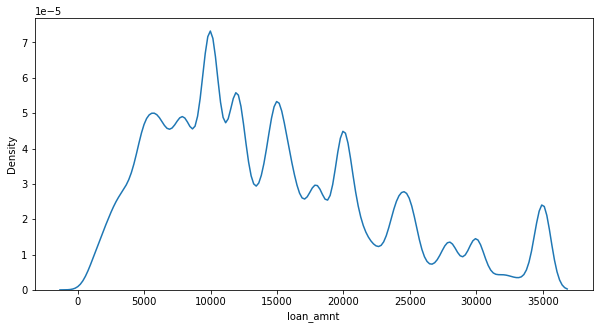

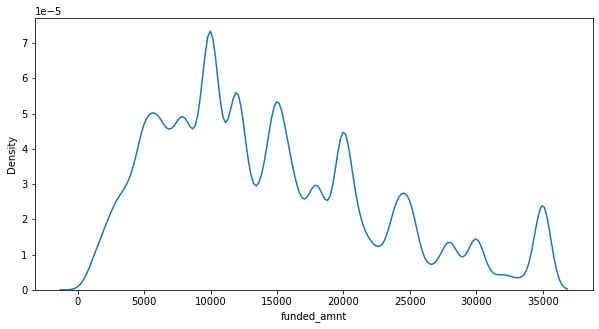

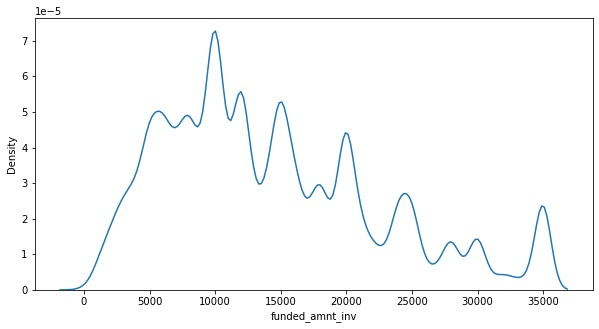

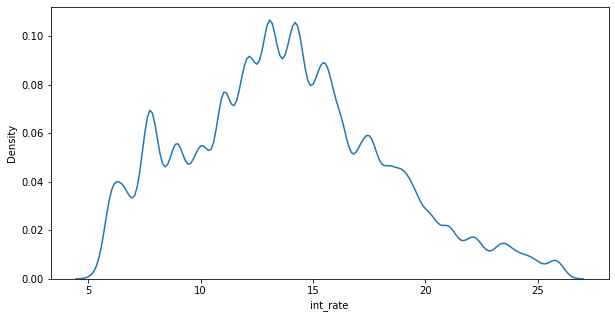

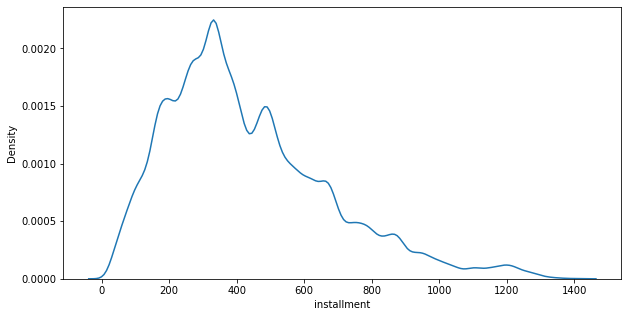

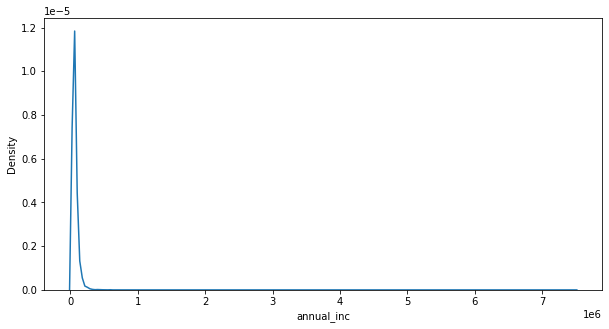

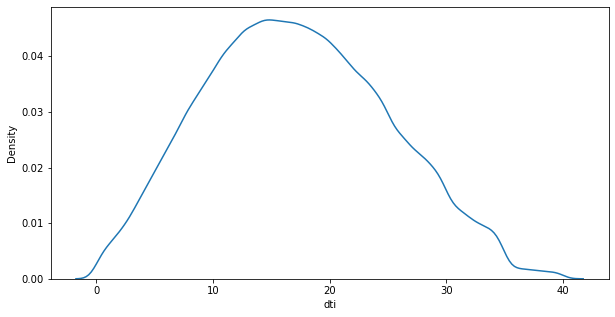

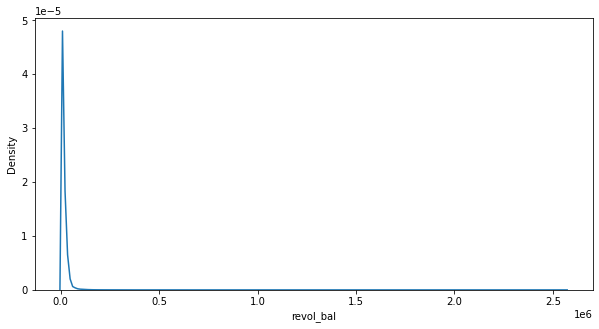

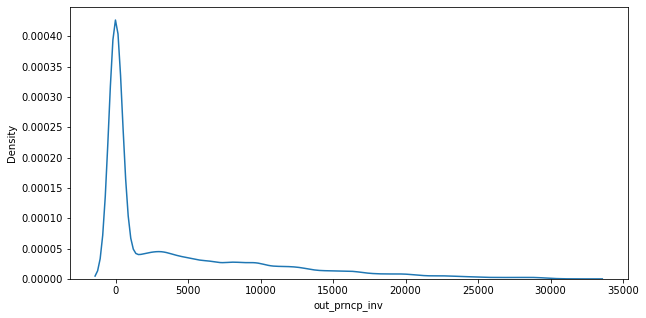

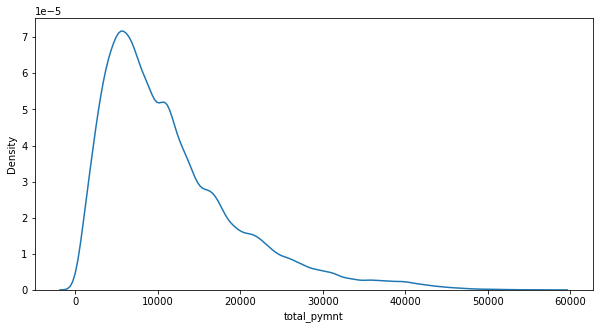

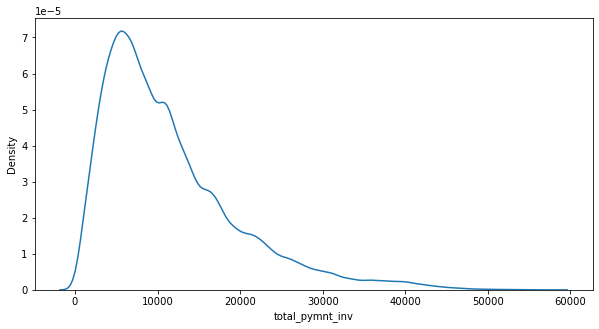

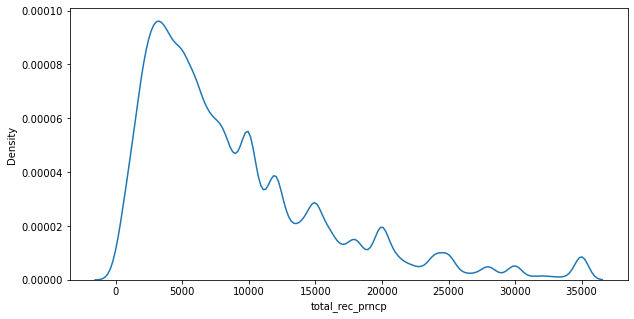

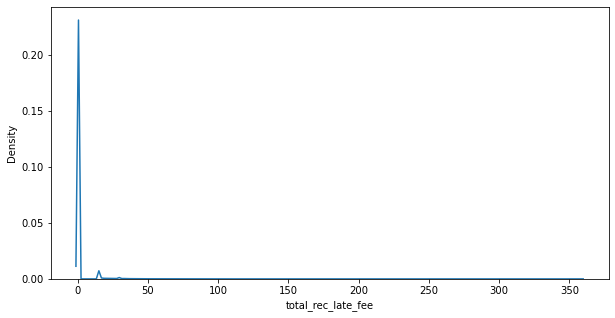

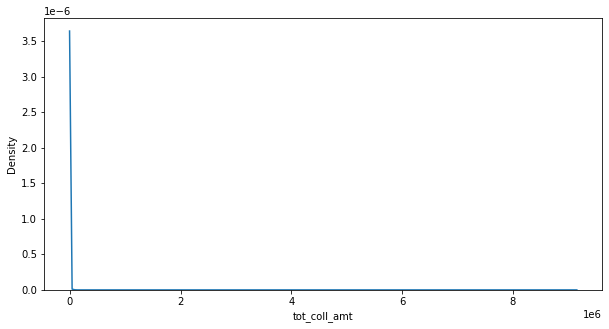

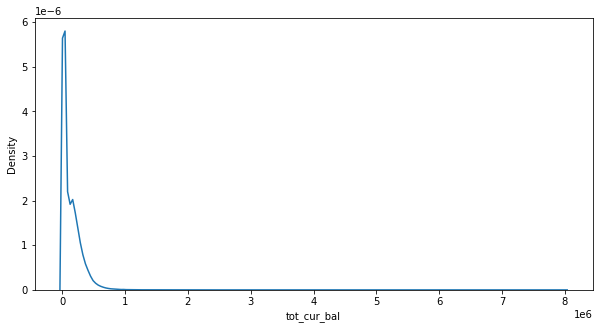

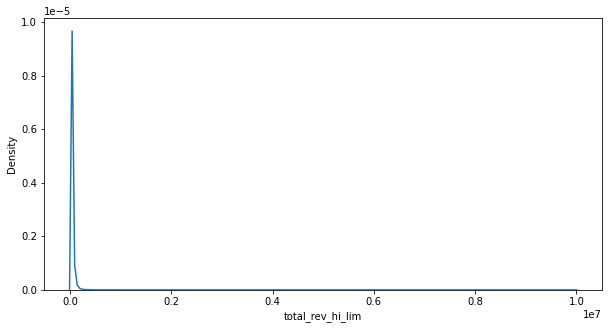

In [407]:
for j in range (0,len(numeric)):
    num = numeric[j]
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=df,x=num)

**Data Insight**

revol_bal,tot_rec_late_fee,tot_coll_amt,tot_cur_ball,total_rev_hi_lim memiliki positive skew yang ekstrim

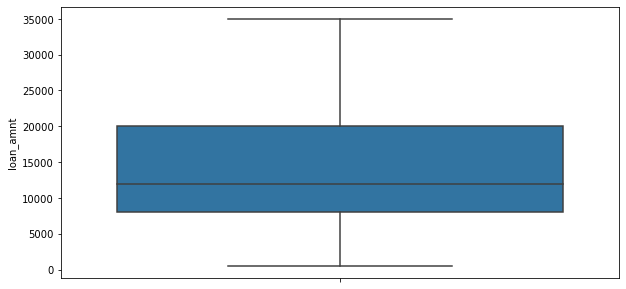

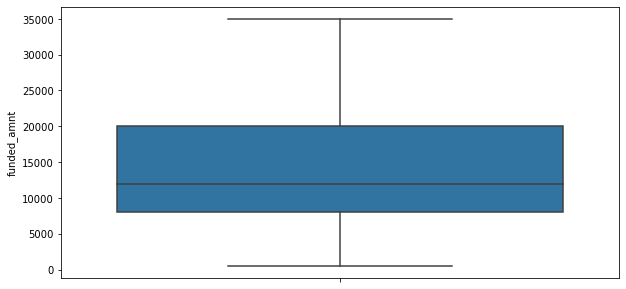

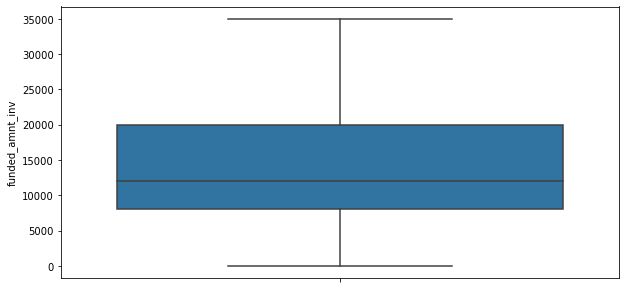

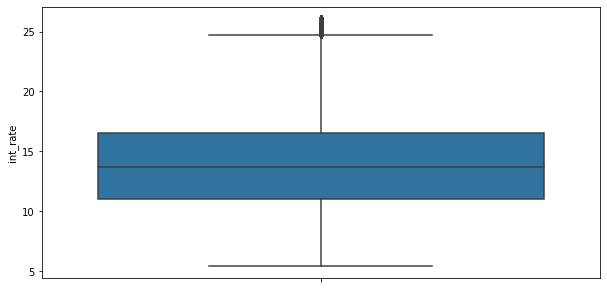

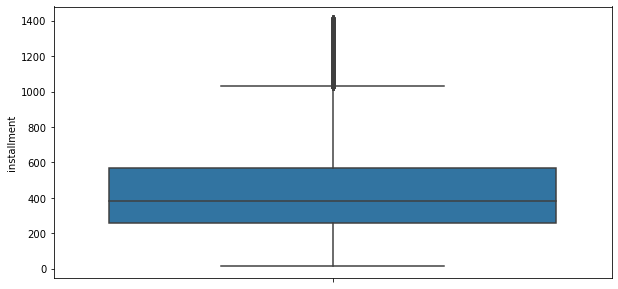

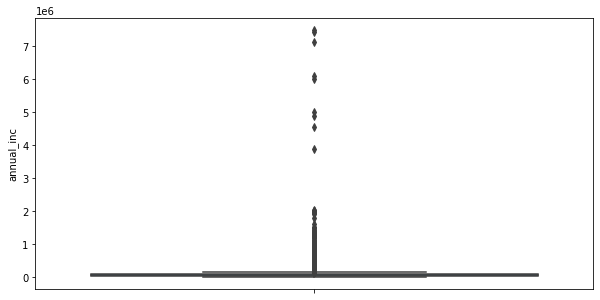

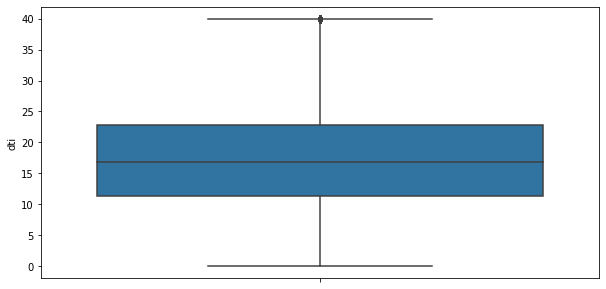

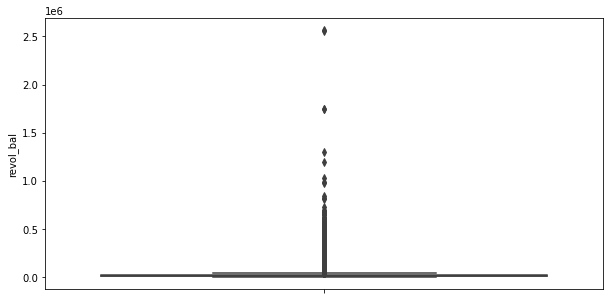

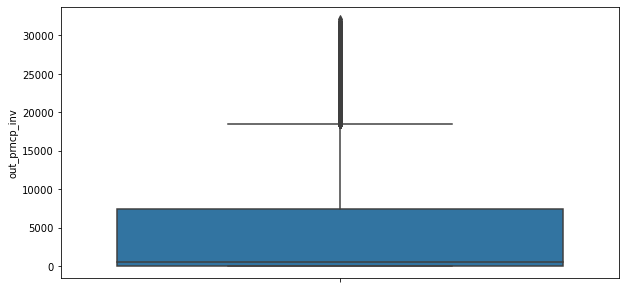

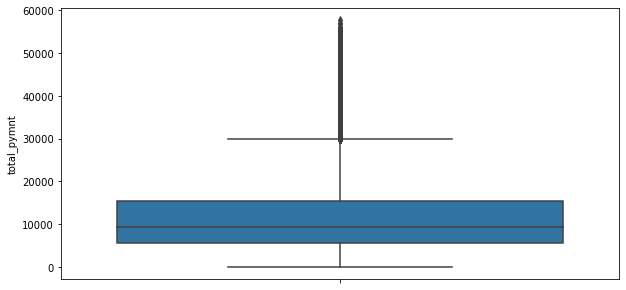

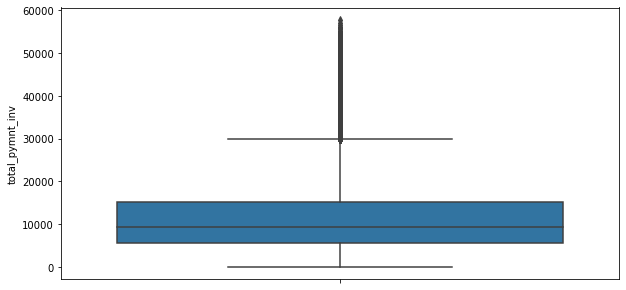

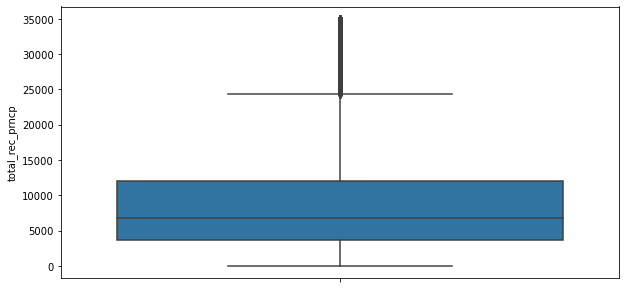

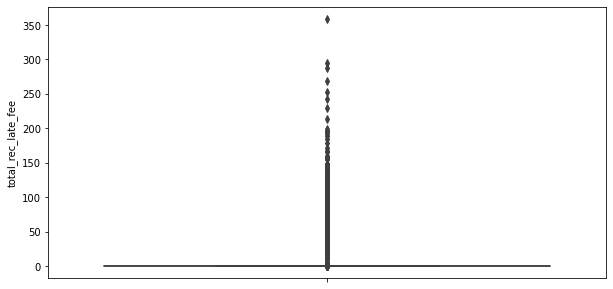

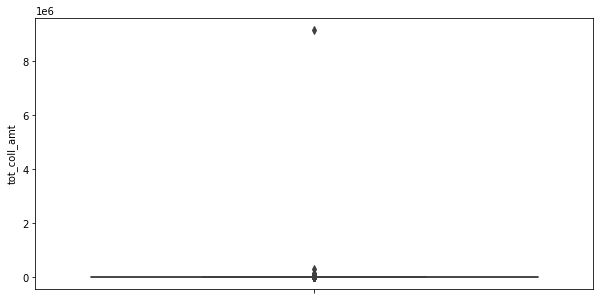

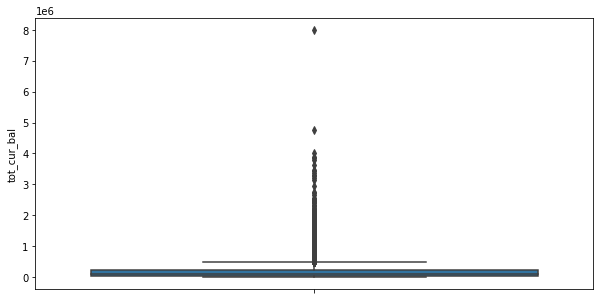

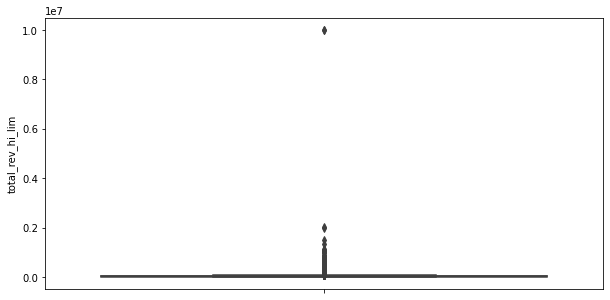

In [408]:
for j in range (0,len(numeric)):
    num = numeric[j]
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df,y=num)

**Data Insight**

revol_bal,tot_rec_late_fee,tot_coll_amt,tot_cur_ball,total_rev_hi_lim memiliki banyak outlier yang ekstrim

In [409]:
outlier = ['revol_bal','total_rec_late_fee','tot_coll_amt','tot_cur_ball','total_rev_hi_lim','annual_inc']

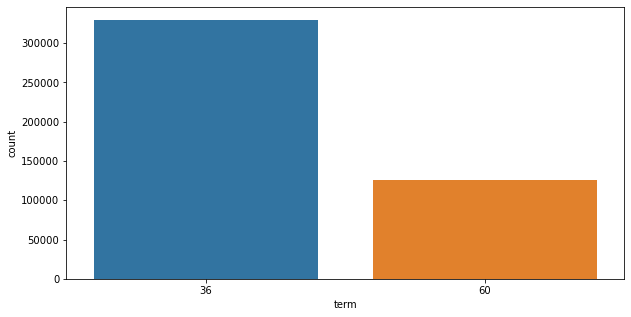

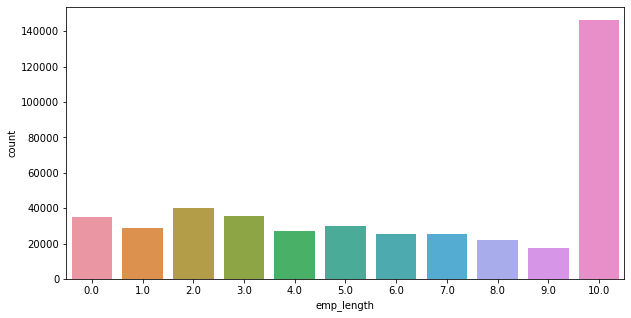

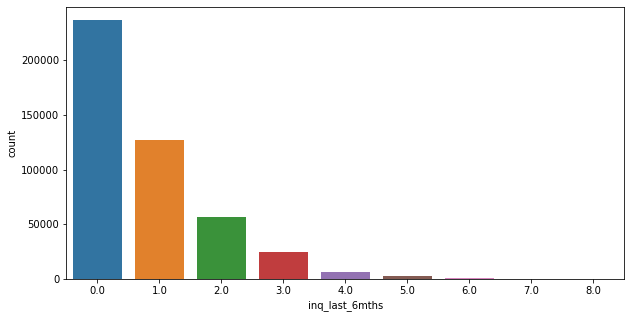

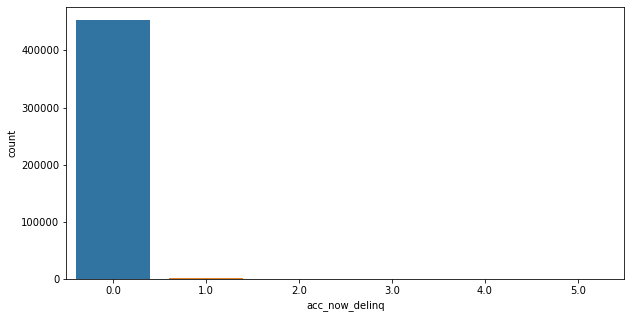

In [410]:
for j in range (0,len(cat_num)):
    num = cat_num[j]
    plt.figure(figsize=(10,5))
    sns.countplot(data=df,x=num)

**Data Insight**

acc_now_delinq memiliki nilai yang sangat timpang

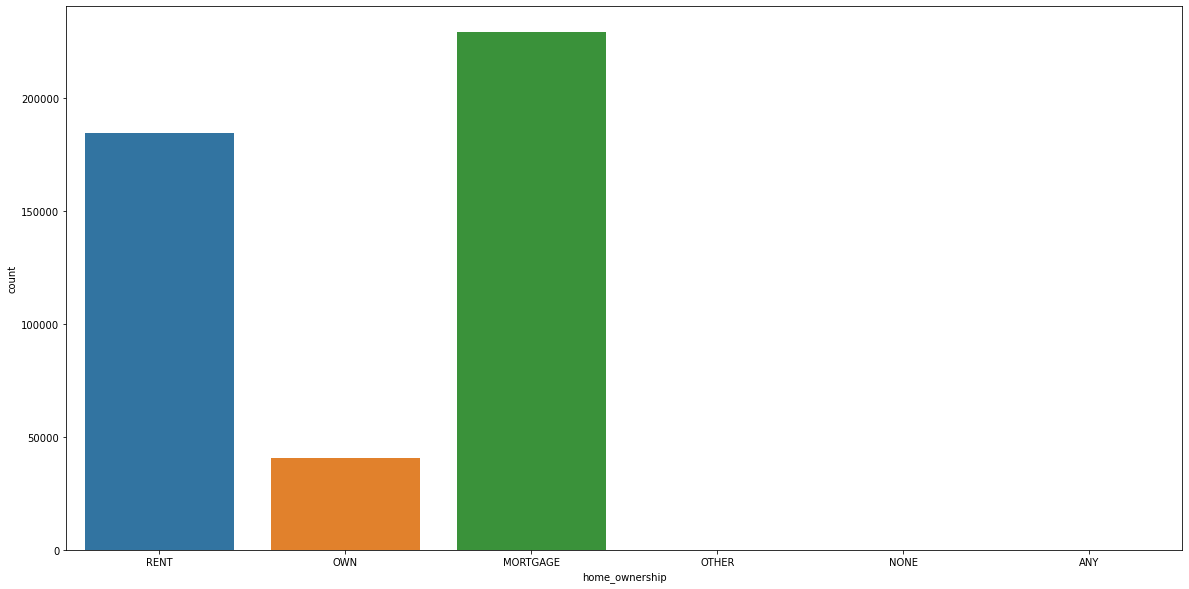

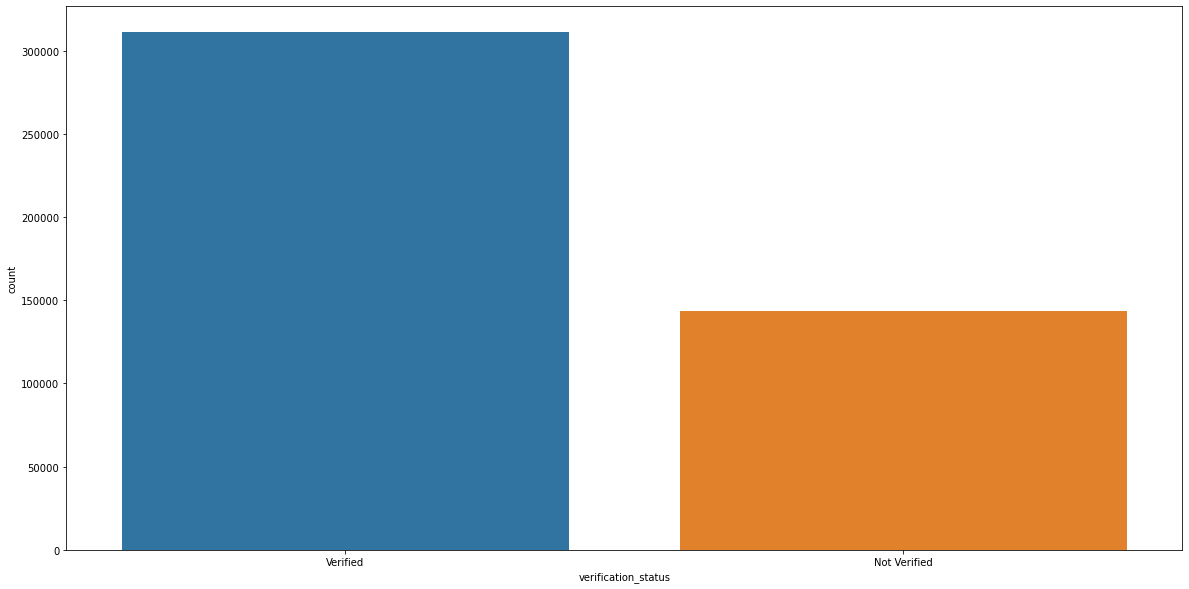

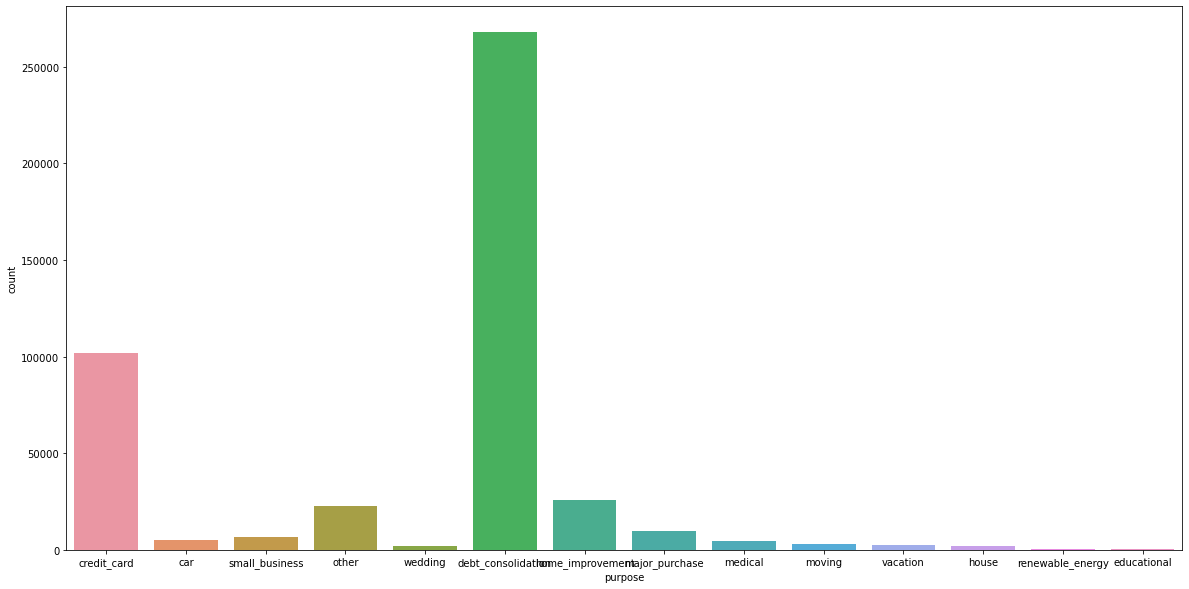

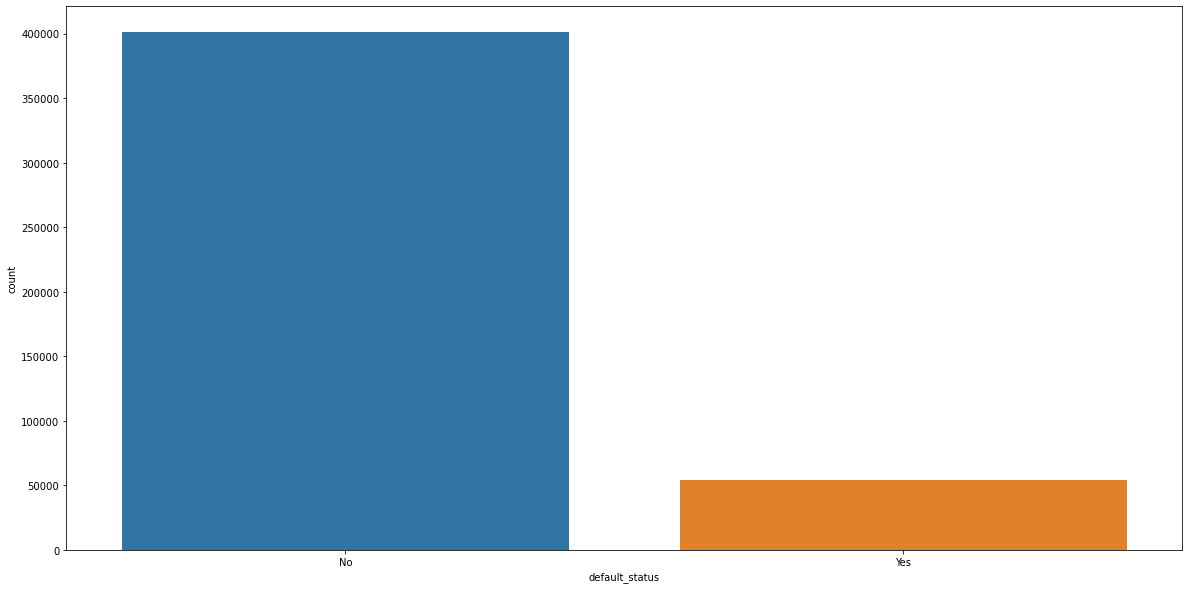

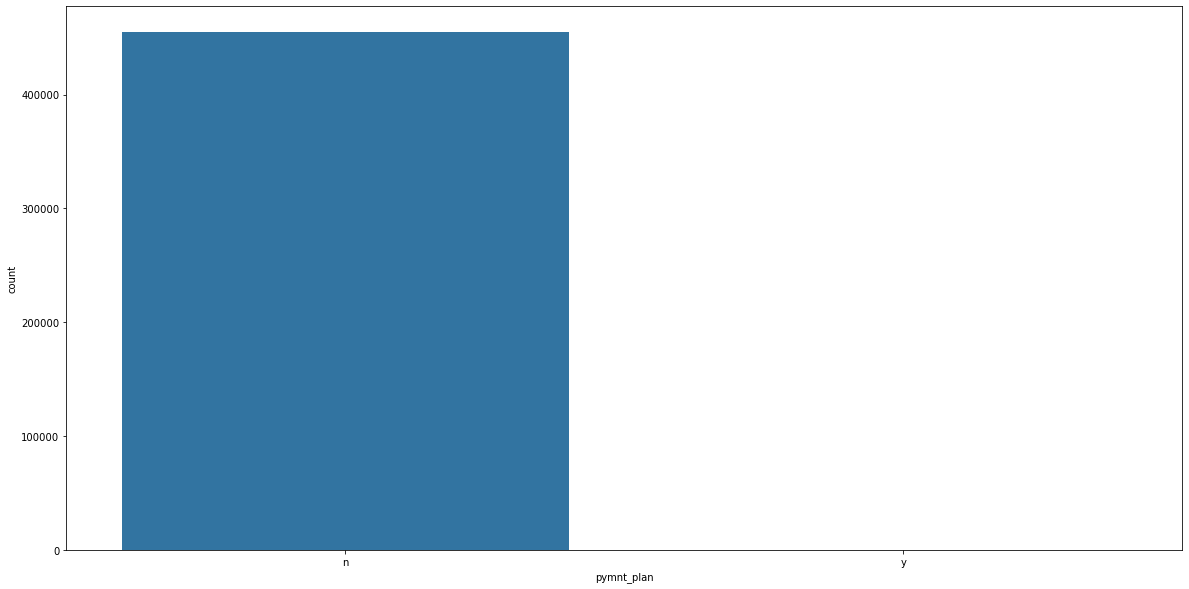

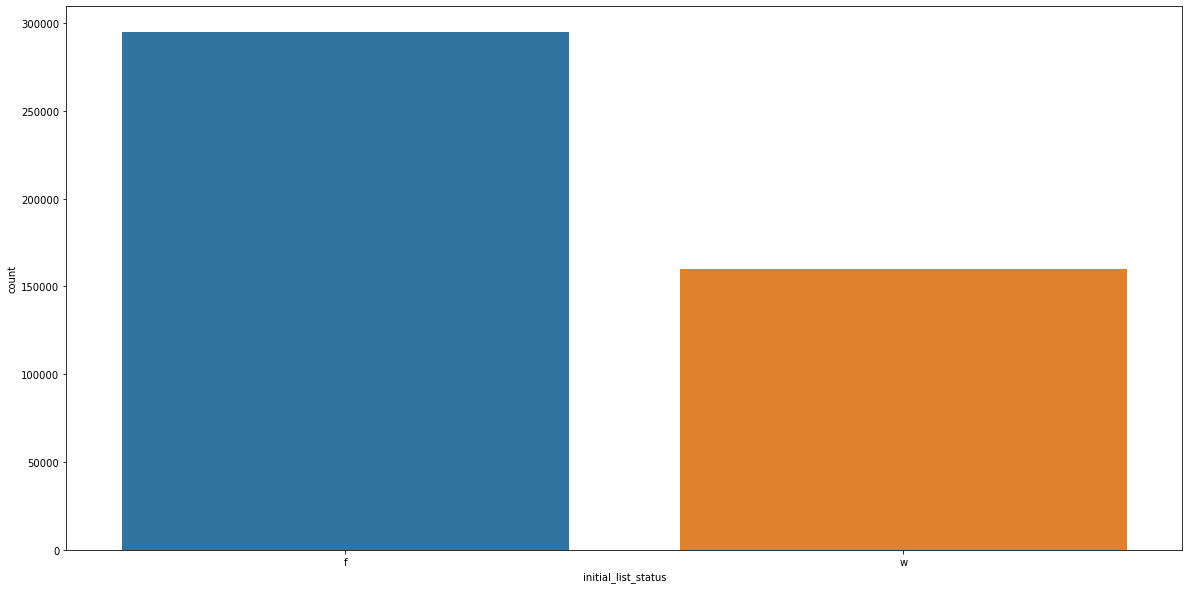

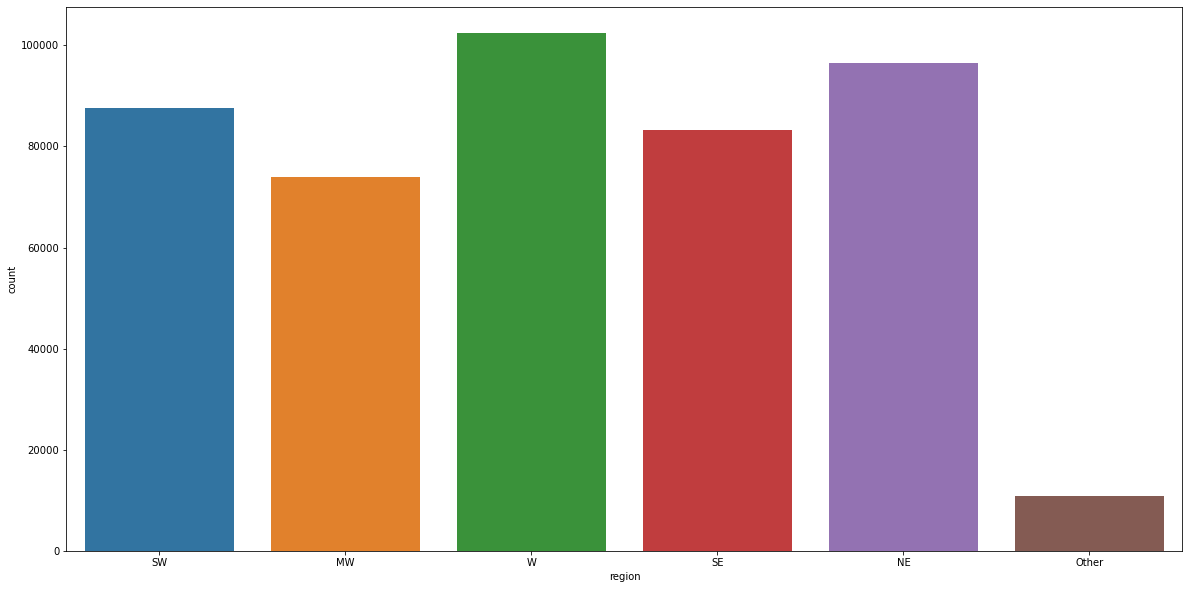

In [411]:
for j in range (0,len(cat)):
    num = cat[j]
    plt.figure(figsize=(20,10))
    sns.countplot(data=df,x=num)

**Data Insight**

    1. debt_consolidation mendominasi purpose credit
    2. dataset imbalance karena variabel no lebih banyak

## Multivaraite Analysis

In [412]:
df['default_status'] = df['default_status'].replace({'Yes':1,'No':0})
df['target'] = df['default_status'] 
df.drop(['default_status'],axis=1,inplace=True) 
df['target'].unique()

array([0, 1], dtype=int64)

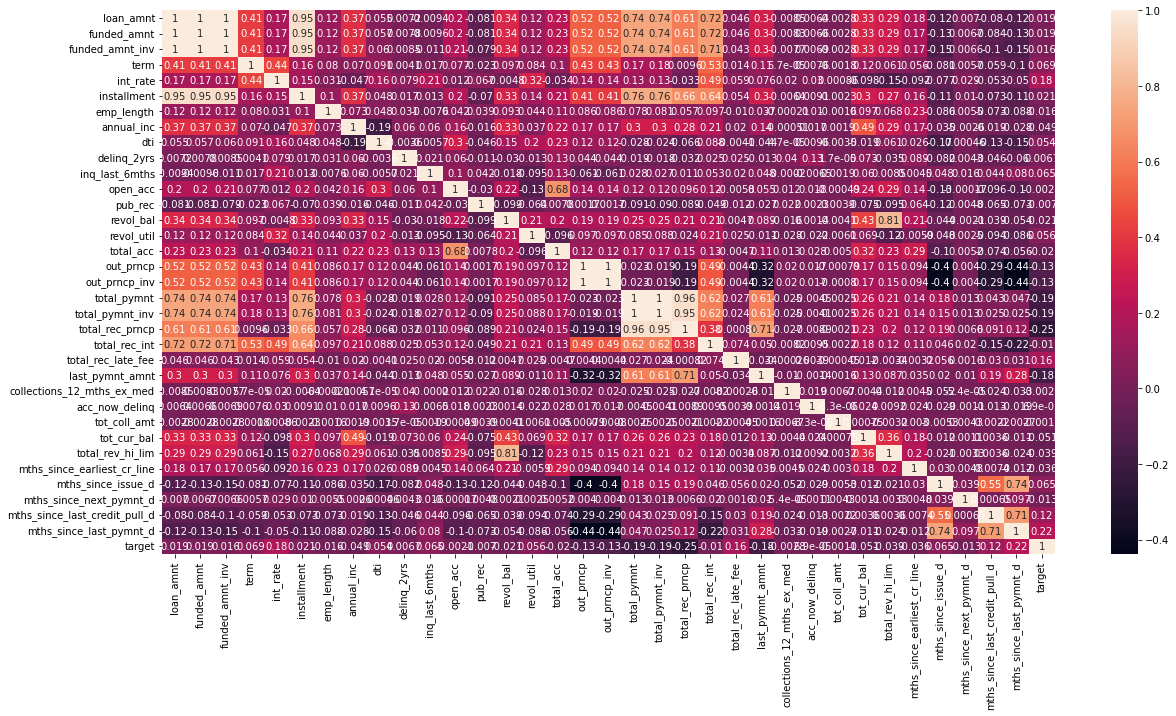

In [413]:
corr = df.describe().columns.tolist()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

korelasi diatas 0.7 akan didrop

In [414]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] >= 0.7)]

In [415]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'last_pymnt_amnt',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d']

In [416]:
df.drop(to_drop_hicorr, axis=1, inplace=True)

In [417]:
preprocessing(df)

,Number of unique values,Percent of Null(%),Number of Null,Type,Values
Variable,,,,,
loan_amnt,1347,0.00,0,int64,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
term,2,0.00,0,int64,"[36, 60]"
int_rate,484,0.00,0,float64,"[10.65, 15.27, 15.96, 13.49, 12.69, 7.9, 18.64..."
emp_length,11,4.51,20510,float64,"[10.0, 0.0, 1.0, 3.0, 8.0, 9.0, 4.0, 5.0, 6.0,..."
home_ownership,6,0.00,0,object,"[RENT, OWN, MORTGAGE, OTHER, NONE, ANY]"
annual_inc,31259,0.00,0,float64,"[24000.0, 30000.0, 12252.0, 49200.0, 80000.0, ..."
verification_status,2,0.00,0,object,"[Verified, Not Verified]"
pymnt_plan,2,0.00,0,object,"[n, y]"
purpose,14,0.00,0,object,"[credit_card, car, small_business, other, wedd..."


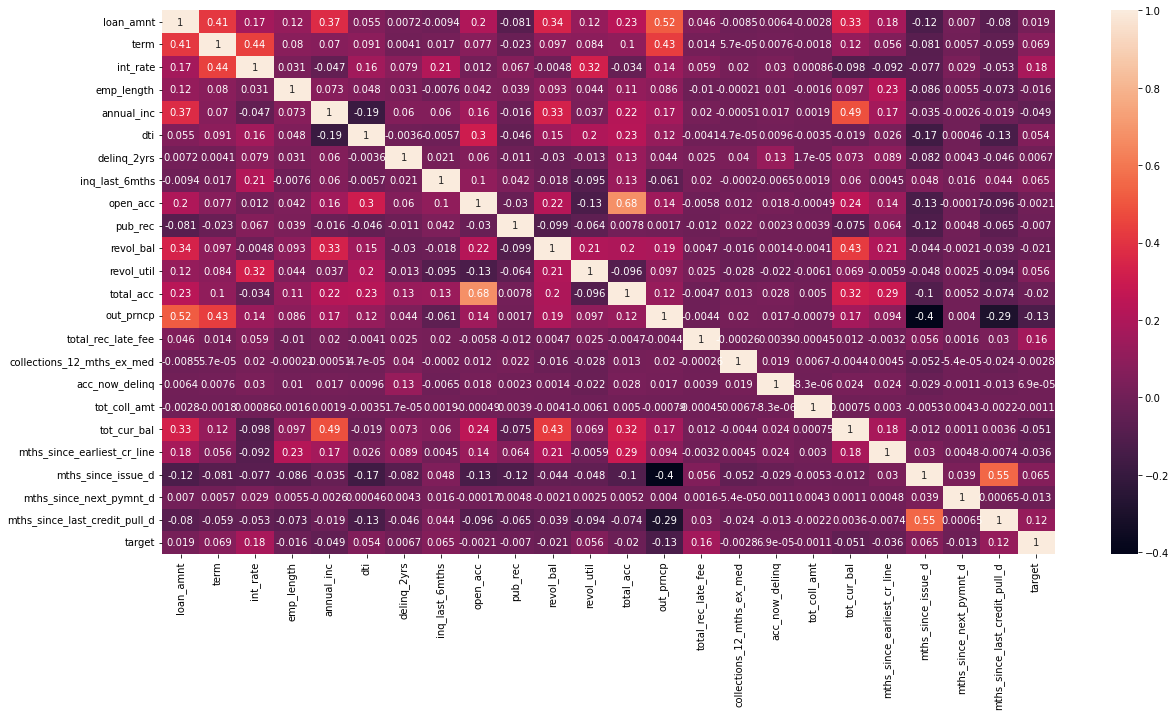

In [418]:
corr = df.describe().columns.tolist()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Data Preprocessing

## Handling Missing Values

In [419]:
preprocessing(df)

,Number of unique values,Percent of Null(%),Number of Null,Type,Values
Variable,,,,,
loan_amnt,1347,0.00,0,int64,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
term,2,0.00,0,int64,"[36, 60]"
int_rate,484,0.00,0,float64,"[10.65, 15.27, 15.96, 13.49, 12.69, 7.9, 18.64..."
emp_length,11,4.51,20510,float64,"[10.0, 0.0, 1.0, 3.0, 8.0, 9.0, 4.0, 5.0, 6.0,..."
home_ownership,6,0.00,0,object,"[RENT, OWN, MORTGAGE, OTHER, NONE, ANY]"
annual_inc,31259,0.00,0,float64,"[24000.0, 30000.0, 12252.0, 49200.0, 80000.0, ..."
verification_status,2,0.00,0,object,"[Verified, Not Verified]"
pymnt_plan,2,0.00,0,object,"[n, y]"
purpose,14,0.00,0,object,"[credit_card, car, small_business, other, wedd..."


In [420]:
df['emp_length'] = df['emp_length'].fillna(0)
df['revol_util']= df['revol_util'].fillna(0)
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0)
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(0)
df['mths_since_last_credit_pull_d'] = df['mths_since_last_credit_pull_d'].fillna(0)

In [421]:
df.drop('mths_since_next_pymnt_d',axis=1,inplace=True)

In [422]:
df.isnull().sum()

loan_amnt                        0
term                             0
int_rate                         0
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
pymnt_plan                       0
purpose                          0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                       0
total_acc                        0
initial_list_status              0
out_prncp                        0
total_rec_late_fee               0
collections_12_mths_ex_med       0
acc_now_delinq                   0
tot_coll_amt                     0
tot_cur_bal                      0
region                           0
mths_since_earliest_cr_line      0
mths_since_issue_d               0
mths_since_last_credit_pull_d    0
target              

# Data Transform

In [423]:
preprocessing(df)

,Number of unique values,Percent of Null(%),Number of Null,Type,Values
Variable,,,,,
loan_amnt,1347,0.00,0,int64,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
term,2,0.00,0,int64,"[36, 60]"
int_rate,484,0.00,0,float64,"[10.65, 15.27, 15.96, 13.49, 12.69, 7.9, 18.64..."
emp_length,11,0.00,0,float64,"[10.0, 0.0, 1.0, 3.0, 8.0, 9.0, 4.0, 5.0, 6.0,..."
home_ownership,6,0.00,0,object,"[RENT, OWN, MORTGAGE, OTHER, NONE, ANY]"
annual_inc,31259,0.00,0,float64,"[24000.0, 30000.0, 12252.0, 49200.0, 80000.0, ..."
verification_status,2,0.00,0,object,"[Verified, Not Verified]"
pymnt_plan,2,0.00,0,object,"[n, y]"
purpose,14,0.00,0,object,"[credit_card, car, small_business, other, wedd..."


In [424]:
features = df[df.columns.difference(['target'])]
labels = df['target']

## WOE and IV

In [425]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [426]:
final_iv, IV = data_vars(df[df.columns.difference(['target'])],df.target)

In [427]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,acc_now_delinq,0.00,1.00,454713,53747,0.12,400966,0.88,1.00,1.00,0.00,0.00
1,acc_now_delinq,2.00,5.00,109,12,0.11,97,0.89,0.00,0.00,-0.08,0.00
2,annual_inc,3000.00,32640.00,41377,6400,0.15,34977,0.85,0.12,0.09,0.31,0.05
3,annual_inc,32642.00,40000.00,45118,6611,0.15,38507,0.85,0.12,0.10,0.25,0.05
4,annual_inc,40001.00,47000.00,39453,5406,0.14,34047,0.86,0.10,0.08,0.17,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...
146,total_acc,38.00,156.00,64133,7085,0.11,57048,0.89,0.13,0.14,-0.08,0.00
147,total_rec_late_fee,0.00,1.00,444655,48520,0.11,396135,0.89,0.90,0.99,-0.09,0.18
148,total_rec_late_fee,1.31,358.68,10167,5239,0.52,4928,0.48,0.10,0.01,2.07,0.18
149,verification_status,Not Verified,Not Verified,143701,14263,0.10,129438,0.90,0.27,0.32,-0.20,0.02


In [428]:
IV.sort_values('IV',ascending=False)

,VAR_NAME,IV
15,out_prncp,0.46
9,int_rate,0.34
26,total_rec_late_fee,0.18
13,mths_since_last_credit_pull_d,0.14
12,mths_since_issue_d,0.07
1,annual_inc,0.05
22,term,0.04
24,tot_cur_bal,0.03
17,purpose,0.03
21,revol_util,0.03


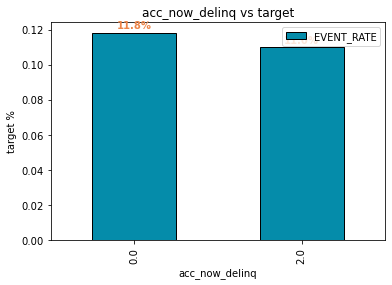

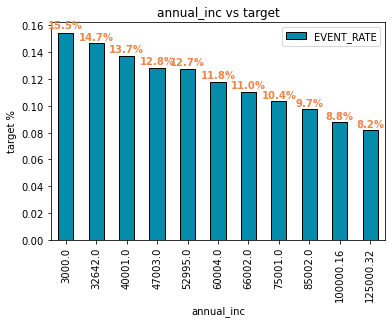

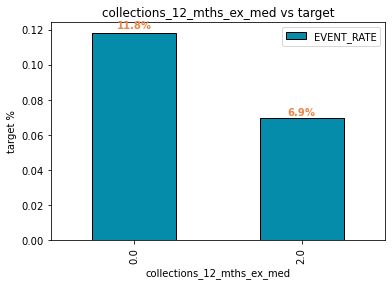

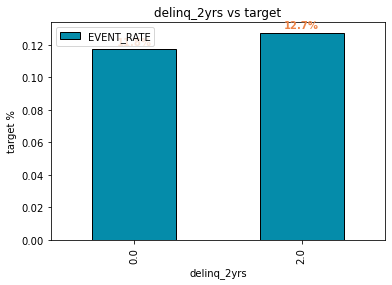

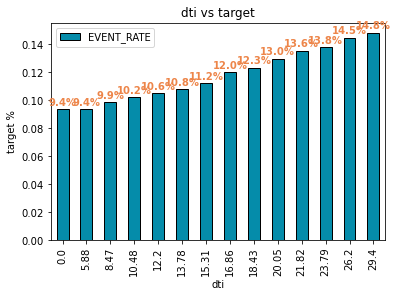

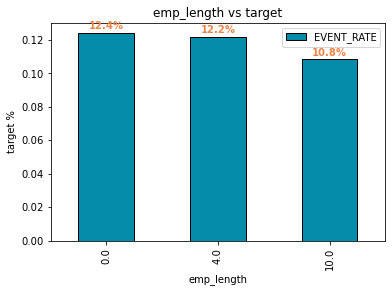

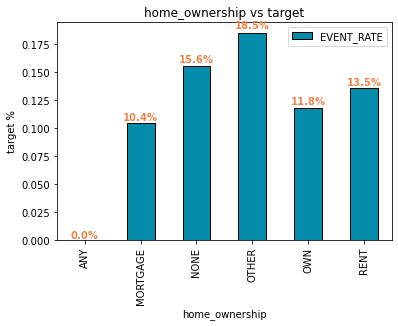

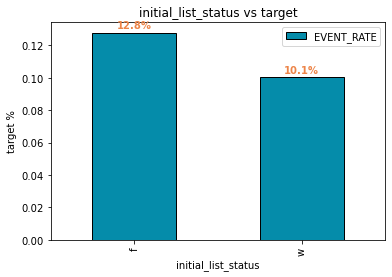

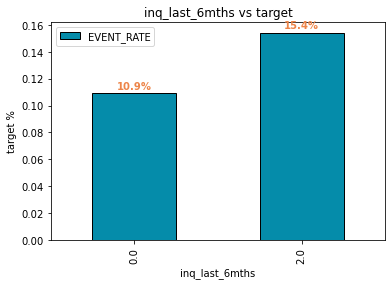

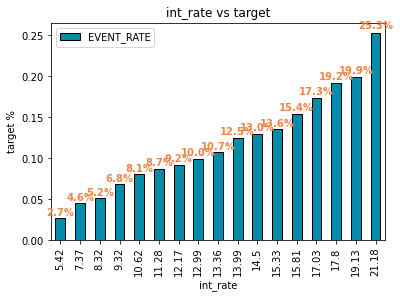

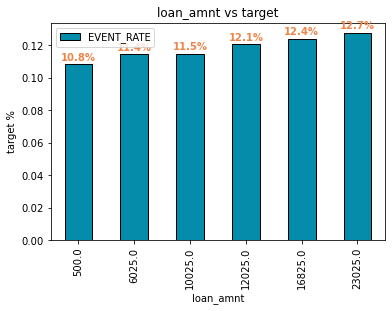

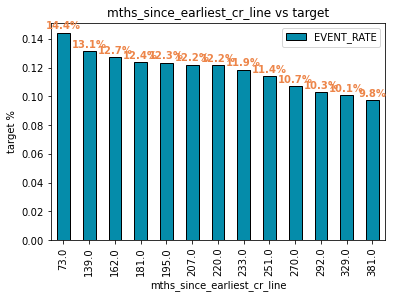

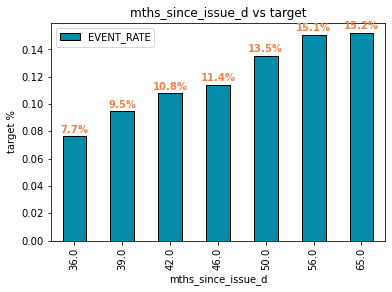

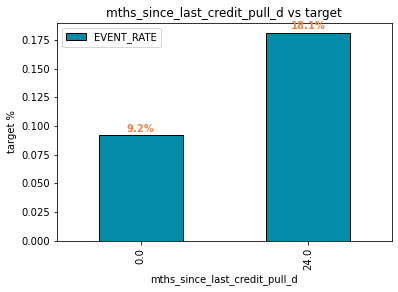

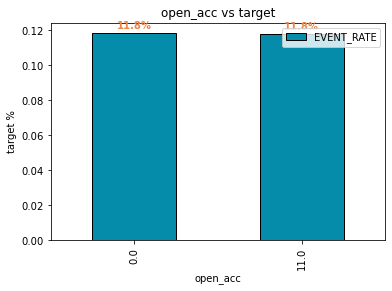

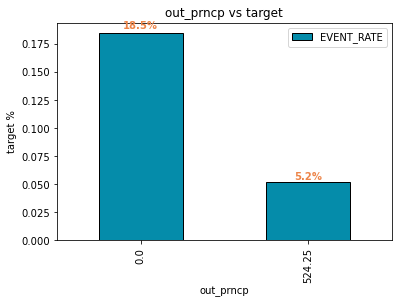

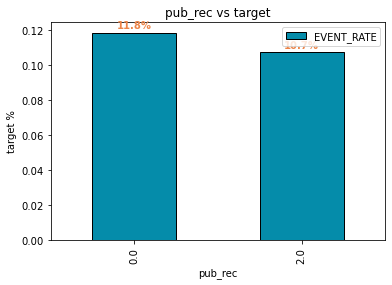

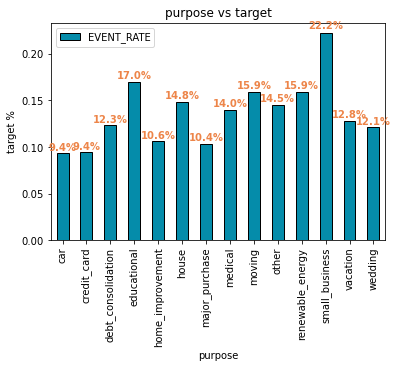

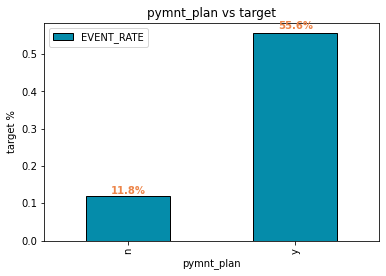

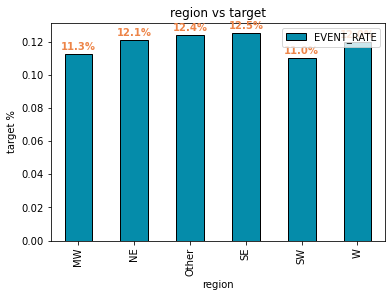

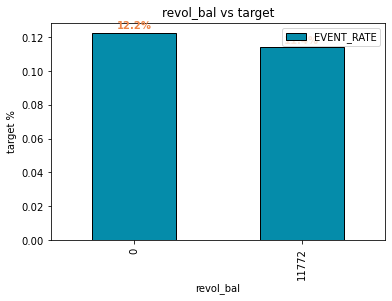

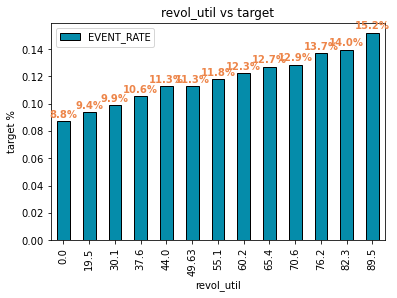

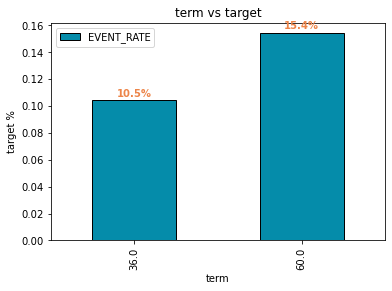

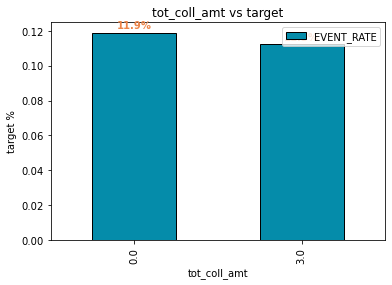

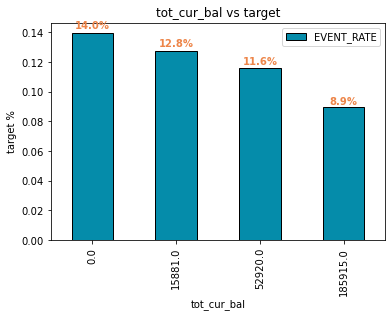

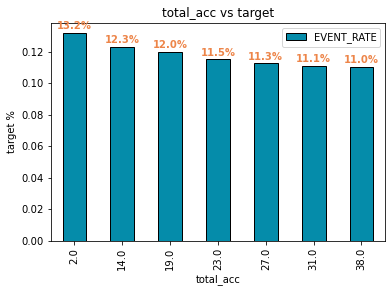

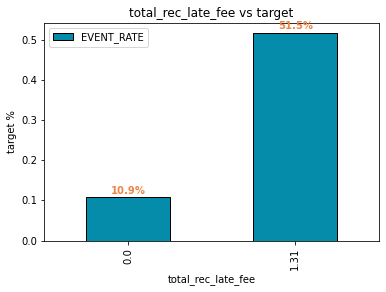

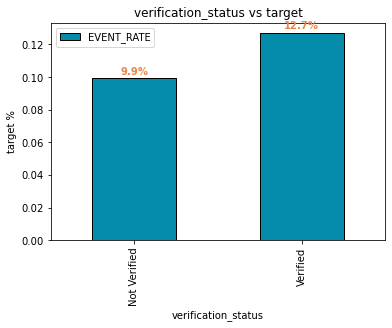

In [429]:
bar_color = '#058caa'
num_color = '#ed8549'

final_iv,_ = data_vars(df,df['target'])
final_iv = final_iv[(final_iv.VAR_NAME != 'target')]
grouped = final_iv.groupby(['VAR_NAME'])
for key, group in grouped:
    ax = group.plot('MIN_VALUE','EVENT_RATE',kind='bar',color=bar_color,linewidth=1.0,edgecolor=['black'])
    ax.set_title(str(key) + " vs " + str('target'))
    ax.set_xlabel(key)
    ax.set_ylabel(str('target') + " %")
    rects = ax.patches
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*height, str(round(height*100,1)) + '%', 
                ha='center', va='bottom', color=num_color, fontweight='bold')

## Data Transform using WOE

In [430]:
transform_vars_list = df.columns.difference(['target'])
transform_prefix = ''

In [431]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            df[transform_prefix + var] = df[var].apply(lambda x: eval(replace_cmd))
        except:
            df[transform_prefix + var] = df[var].apply(lambda x: eval(replace_cmd1))

# Feature Engineering Vote Based Approach

## Random Forest

In [432]:
features = df.drop('target',axis=1)
labels = df['target']

In [433]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)

0.999973616051994


In [434]:
from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)

In [435]:
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

,index,RF
2,int_rate,0.09
25,mths_since_earliest_cr_line,0.09
15,revol_util,0.08
9,dti,0.08
5,annual_inc,0.07
16,total_acc,0.06
24,region,0.06
0,loan_amnt,0.05
26,mths_since_issue_d,0.05
8,purpose,0.05


##  Recursive Feature Elimination

In [436]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(features, labels)

In [437]:
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()

In [438]:
Selected[Selected['RFE'] == True]

,index,RFE
0,loan_amnt,True
1,term,True
2,int_rate,True
3,emp_length,True
4,home_ownership,True
5,annual_inc,True
7,pymnt_plan,True
9,dti,True
10,delinq_2yrs,True
18,out_prncp,True


##  Extratrees Classifier

In [439]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

[5.57468870e-02 1.60908154e-02 8.54986243e-02 4.36135509e-02
 2.88769214e-02 6.86746390e-02 1.54152782e-02 7.46394337e-05
 4.92466376e-02 7.44009396e-02 1.05271900e-02 1.24748358e-02
 2.26786270e-02 4.41548732e-03 2.01812972e-02 7.38613694e-02
 6.25652778e-02 1.95011061e-02 4.08803276e-02 3.27429387e-02
 1.99754080e-04 1.14827831e-04 1.39173058e-02 3.67040307e-02
 6.29228088e-02 7.49925973e-02 5.57621568e-02 1.79191292e-02]


In [440]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)

In [441]:
FI = FI.reset_index()

In [442]:
FI.sort_values(['Extratrees'],ascending=0)

,index,Extratrees
2,int_rate,0.09
25,mths_since_earliest_cr_line,0.07
9,dti,0.07
15,revol_util,0.07
5,annual_inc,0.07
24,region,0.06
16,total_acc,0.06
26,mths_since_issue_d,0.06
0,loan_amnt,0.06
8,purpose,0.05


## Chi Square

In [443]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features.abs(), labels)

In [444]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features.columns)

In [445]:
chi_sq = chi_sq.reset_index()

In [446]:
chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
19,total_rec_late_fee,10032.64
18,out_prncp,955.03
2,int_rate,261.80
27,mths_since_last_credit_pull_d,206.02
11,inq_last_6mths,80.44
1,term,66.03
23,tot_cur_bal,28.03
26,mths_since_issue_d,21.56
6,verification_status,17.44
7,pymnt_plan,12.81


## L1 Feature Selection

In [447]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)

In [448]:
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=features.columns)
l1 = l1.reset_index()

In [449]:
l1[l1['L1'] == True]

,index,L1
0,loan_amnt,True
1,term,True
2,int_rate,True
3,emp_length,True
4,home_ownership,True
5,annual_inc,True
6,verification_status,True
8,purpose,True
9,dti,True
10,delinq_2yrs,True


## Combine All Togather

In [450]:
IV = IV.rename(columns={'VAR_NAME':'index'})

In [451]:
from functools import reduce
dfs = [IV, VI, Selected, FI, chi_sq, l1]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

In [452]:
columns = ['IV', 'RF', 'Extratrees', 'Chi_Square']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

In [453]:
score_table['final_score'] = score_table.sum(axis=1)

In [454]:
score_table.sort_values('final_score',ascending=0)

,index,IV,RF,Extratrees,Chi_Square,RFE,L1,final_score
9,int_rate,1,1,1,1,1,1,6
26,total_rec_late_fee,1,0,0,1,1,1,4
15,out_prncp,1,0,0,1,1,1,4
1,annual_inc,0,1,1,0,1,1,4
4,dti,0,1,1,0,1,1,4
13,mths_since_last_credit_pull_d,1,0,0,1,0,1,3
21,revol_util,0,1,1,0,0,1,3
11,mths_since_earliest_cr_line,0,1,1,0,0,1,3
10,loan_amnt,0,0,0,0,1,1,2
19,region,0,0,0,0,1,1,2


In [457]:
features

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,region,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_credit_pull_d
0,-0.10,-0.14,-0.42,-0.10,0.16,0.31,0.08,-0.00,-0.25,0.23,-0.01,-0.09,0.00,0.00,-0.04,0.19,0.12,0.09,0.53,-0.09,0.00,0.00,0.01,0.19,-0.08,-0.21,0.29,-0.28
1,-0.10,0.31,0.11,0.05,0.16,0.31,0.08,-0.00,-0.26,-0.26,-0.01,0.31,0.00,0.00,0.04,-0.33,0.12,0.09,0.53,-0.09,0.00,0.00,0.01,0.19,-0.08,0.03,0.29,0.50
2,-0.10,-0.14,0.30,-0.10,0.16,0.31,-0.20,-0.00,0.76,-0.20,-0.01,0.31,0.00,0.00,0.04,0.29,0.12,0.09,0.53,-0.09,0.00,0.00,0.01,0.19,-0.06,0.06,0.29,-0.28
3,-0.04,-0.14,-0.11,-0.10,0.16,0.09,0.08,-0.00,0.23,0.05,-0.01,-0.09,0.00,0.00,0.04,-0.25,-0.07,0.09,0.53,2.07,0.00,0.00,0.01,0.19,0.02,-0.04,0.29,0.50
4,-0.10,0.31,-0.28,0.05,0.16,-0.15,0.08,-0.00,0.23,0.02,-0.01,-0.09,-0.00,0.00,-0.04,-0.05,-0.08,0.09,-0.90,-0.09,0.00,0.00,0.01,0.19,0.02,-0.04,0.29,-0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463531,0.05,0.31,0.07,0.03,-0.14,-0.33,0.08,-0.00,0.05,0.05,-0.01,0.31,-0.00,0.00,-0.04,0.17,-0.07,-0.18,-0.90,-0.09,0.00,0.00,0.01,-0.31,-0.08,0.08,-0.04,-0.28
463532,0.05,0.31,0.62,-0.10,-0.14,-0.15,0.08,-0.00,0.05,0.05,-0.01,0.31,-0.00,0.00,-0.04,-0.05,-0.05,0.09,0.53,-0.09,0.00,0.00,0.01,-0.31,-0.08,0.00,-0.04,-0.28
463533,0.05,0.31,0.30,0.03,-0.14,0.17,0.08,-0.00,0.05,0.18,-0.01,0.31,-0.00,0.00,0.04,-0.05,-0.08,0.09,-0.90,-0.09,0.00,0.00,0.01,-0.02,-0.06,0.06,-0.04,0.50
463534,-0.10,-0.14,-1.03,0.05,0.00,-0.15,0.08,-0.00,-0.25,-0.26,0.09,-0.09,-0.00,0.00,0.04,-0.25,-0.05,-0.18,0.53,-0.09,0.00,0.00,0.01,-0.31,0.02,0.08,-0.04,0.50


# Modeling

In [458]:
X = features
y= df['target']

In [459]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=21)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [460]:
features_train = X_train
features_test = X_test
label_train = y_train
label_test = y_test

## Logistic Regression

In [461]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]

from sklearn.metrics import accuracy_score
accuracy_train_lr = accuracy_score(pred_train,label_train)
accuracy_test_lr = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lr = precision_score(pred_train,label_train)
precision_test_lr = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lr = recall_score(pred_train,label_train)
recall_test_lr = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lr = f1_score(pred_train,label_train)
f1_test_lr = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lr = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lr = metrics.auc(fpr,tpr)
auc_overfitting_lr = auc_test_lr-auc_train_lr

print('accuracy model :',accuracy_test_lr*100,'%')
print('AUC :',auc_test_lr*100,'%')
print('AUC overfitting:',auc_overfitting_lr*100,'%')

accuracy model : 69.51684713900951 %
AUC : 77.35132529361188 %
AUC overfitting: -0.13796748603697173 %


## Decision Trees

In [462]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]

from sklearn.metrics import accuracy_score
accuracy_train_dct = accuracy_score(pred_train,label_train)
accuracy_test_dct = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_dct = precision_score(pred_train,label_train)
precision_test_dct = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_dct = recall_score(pred_train,label_train)
recall_test_dct = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_dct = f1_score(pred_train,label_train)
f1_test_dct = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_dct = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_dct = metrics.auc(fpr,tpr)
auc_overfitting_dct = auc_test_dct-auc_train_dct
print('accuracy model :',accuracy_test_dct*100,'%')
print('AUC :',auc_test_dct*100,'%')
print('AUC overfitting :',auc_overfitting_dct )

accuracy model : 80.29242016160062 %
AUC : 57.5141930241033 %
AUC overfitting : -0.424858069758967


## Random Forest

In [463]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_rf = accuracy_score(pred_train,label_train)
accuracy_test_rf = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_rf = precision_score(pred_train,label_train)
precision_test_rf = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_rf = recall_score(pred_train,label_train)
recall_test_rf = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_rf = f1_score(pred_train,label_train)
f1_test_rf = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_rf = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_rf = metrics.auc(fpr,tpr)
auc_overfitting_rf = auc_test_rf-auc_train_rf


print('accuracy model :',accuracy_test_rf*100,'%')
print('AUC :',auc_test_rf*100,'%')
print('AUC overfitting :',auc_overfitting_rf*100,'%' )

accuracy model : 88.38124553399659 %
AUC : 76.98063527941021 %
AUC overfitting : -23.019364720589795 %


## Gradient Boosting

In [464]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_gb = accuracy_score(pred_train,label_train)
accuracy_test_gb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_gb = precision_score(pred_train,label_train)
precision_test_gb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_gb = recall_score(pred_train,label_train)
recall_test_gb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_gb = f1_score(pred_train,label_train)
f1_test_gb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_gb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_gb = metrics.auc(fpr,tpr)
auc_overfitting_gb = auc_test_gb-auc_train_gb

print('accuracy model :',accuracy_test_gb*100,'%')
print('accuracy overfitting :',(accuracy_train_gb-accuracy_test_gb)*100,'%')
print('AUC :',auc_test_gb*100,'%')
print('AUC overfitting :',auc_overfitting_gb*100,'%' )

accuracy model : 88.14049359643819 %
accuracy overfitting : 4.089619331716577 %
AUC : 76.54696624417694 %
AUC overfitting : -20.039346003688983 %


## Light GBM

In [465]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_lgb = accuracy_score(pred_train,label_train)
accuracy_test_lgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lgb = precision_score(pred_train,label_train)
precision_test_lgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lgb = recall_score(pred_train,label_train)
recall_test_lgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lgb = f1_score(pred_train,label_train)
f1_test_lgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lgb = metrics.auc(fpr,tpr)
auc_overfitting_lgb = auc_test_lgb-auc_train_lgb

print('accuracy model :',accuracy_test_lgb*100,'%')
print('AUC :',auc_test_lgb*100,'%')
print('AUC overfitting :',auc_overfitting_lgb*100,'%' )

accuracy model : 88.49557522123894 %
AUC : 78.43374599834343 %
AUC overfitting : -18.712449643865625 %


## XGBoost

In [466]:
import xgboost as xgb
clf = xgb.XGBClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_xgb = accuracy_score(pred_train,label_train)
accuracy_test_xgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_xgb = precision_score(pred_train,label_train)
precision_test_xgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_xgb = recall_score(pred_train,label_train)
recall_test_xgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_xgb = f1_score(pred_train,label_train)
f1_test_xgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_xgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_xgb = metrics.auc(fpr,tpr)
auc_overfitting_xgb = auc_test_xgb-auc_train_xgb

print('accuracy model :',accuracy_test_xgb*100,'%')
print('AUC :',auc_test_xgb*100,'%')
print('AUC overfitting :',auc_overfitting_xgb*100,'%' )

accuracy model : 88.51646237563898 %
AUC : 78.39358276446475 %
AUC overfitting : -18.97848639994756 %


## Summary

In [467]:
kesimpulan = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest','XGBoost','Light GBM','Gradient Boosting'],
                          'AUC Test':list(np.array([auc_test_lr,auc_test_dct,auc_test_rf,auc_test_xgb,auc_test_lgb,auc_test_gb])*100),
                           'AUC Train':list(np.array([auc_train_lr,auc_train_dct,auc_train_rf,auc_train_xgb,auc_train_lgb,auc_train_gb])*100)})
kesimpulan.sort_values('AUC Test',ascending=False)

,Model,AUC Test,AUC Train
4,Light GBM,78.43,97.15
3,XGBoost,78.39,97.37
0,Linear Regression,77.35,77.49
2,Random Forest,76.98,100.00
5,Gradient Boosting,76.55,96.59
1,Decision Tree,57.51,100.00


In [470]:
kesimpulan = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest','XGBoost','Light GBM','Gradient Boosting'],
                          'PRECISION Test':list(np.array([precision_test_lr,precision_test_dct,precision_test_rf,precision_test_xgb,precision_test_lgb,precision_test_gb])*100),
                           'PRECISION Train':list(np.array([precision_train_lr,precision_train_dct,precision_train_rf,precision_train_xgb,precision_train_lgb,precision_train_gb])*100)})
kesimpulan.sort_values('PRECISION Test',ascending=False)


,Model,PRECISION Test,PRECISION Train
0,Linear Regression,72.05,72.14
1,Decision Tree,27.63,100.00
5,Gradient Boosting,13.44,86.25
2,Random Forest,11.50,100.00
3,XGBoost,11.27,88.33
4,Light GBM,9.03,87.80


# Hyperparameter Tuning

In [473]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]

from sklearn.metrics import accuracy_score
accuracy_train_lr = accuracy_score(pred_train,label_train)
accuracy_test_lr = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lr = precision_score(pred_train,label_train)
precision_test_lr = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lr = recall_score(pred_train,label_train)
recall_test_lr = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lr = f1_score(pred_train,label_train)
f1_test_lr = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lr = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lr = metrics.auc(fpr,tpr)
auc_overfitting_lr = auc_test_lr-auc_train_lr

print('precision model :',precision_test_lr*100,'%')
print('AUC :',auc_test_lr*100,'%')
print('AUC test:',auc_test_lr*100,'%')

precision model : 72.05474385056408 %
AUC : 77.35132529361188 %
AUC test: 77.35132529361188 %


In [474]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Learning Curve

## min_child_weight

In [216]:
def draw_learning_curve(param_values):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    train_scores = []
    test_scores = []

    for c in param_values:
        model = lgb.LGBMClassifier(min_child_weight=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)
        
        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))
        
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()

In [222]:
param_values =  [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]

param value: 1e-05; train: 0.795383597971477; test: 0.7863375444042638
param value: 0.001; train: 0.795383597971477; test: 0.7863375444042638
param value: 0.01; train: 0.795383597971477; test: 0.7863375444042638
param value: 0.1; train: 0.795383597971477; test: 0.7863375444042638
param value: 1; train: 0.7951374334543686; test: 0.78611132134019
param value: 10.0; train: 0.7943239224114174; test: 0.7862467924740084
param value: 100.0; train: 0.7923402428486312; test: 0.785310412005145
param value: 1000.0; train: 0.7690309333892061; test: 0.7654464995545432
param value: 10000.0; train: 0.7460680790826596; test: 0.7469660511576889


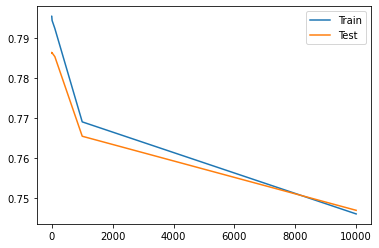

In [223]:
draw_learning_curve(param_values)

min_child_weight = 1e-5

## reg_alpha

In [224]:
def draw_learning_curve(param_values):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    train_scores = []
    test_scores = []

    for c in param_values:
        model = lgb.LGBMClassifier(min_child_weight=1e-5,reg_alpha=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)
        
        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))
        
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()

In [225]:
param_values = [0, 1e-1, 1, 2, 5, 7, 10, 50, 100]

param value: 0; train: 0.795383597971477; test: 0.7863375444042638
param value: 0.1; train: 0.7950496388587438; test: 0.7859560792892818
param value: 1; train: 0.7943608031988331; test: 0.7859335503774263
param value: 2; train: 0.7934363393064194; test: 0.7855226270401671
param value: 5; train: 0.7925251041357722; test: 0.7852990154469788
param value: 7; train: 0.7920483211942483; test: 0.7856528325441545
param value: 10; train: 0.7919640204323837; test: 0.7859965314174877
param value: 50; train: 0.7878497528913595; test: 0.783912256913393
param value: 100; train: 0.7844168624600933; test: 0.7818849553934122


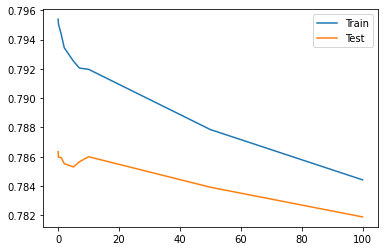

In [226]:
draw_learning_curve(param_values)

reg_alpha = 0

## reg_lambda

In [308]:
def draw_learning_curve(param_values):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    train_scores = []
    test_scores = []

    for c in param_values:
        model = lgb.LGBMClassifier(min_child_weight=1e-5,reg_alpha=0,reg_lambda = c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)
        
        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))
        
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()

In [227]:
param_values = [0, 1e-1, 1, 5, 10, 20, 50, 100]

param value: 0; train: 0.795383597971477; test: 0.7863375444042638
param value: 0.1; train: 0.7950496388587438; test: 0.7859560792892818
param value: 1; train: 0.7943608031988331; test: 0.7859335503774263
param value: 5; train: 0.7925251041357722; test: 0.7852990154469788
param value: 10; train: 0.7919640204323837; test: 0.7859965314174877
param value: 20; train: 0.7904666519011456; test: 0.7851014608760809
param value: 50; train: 0.7878497528913595; test: 0.783912256913393
param value: 100; train: 0.7844168624600933; test: 0.7818849553934122


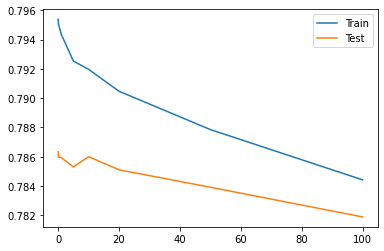

In [228]:
draw_learning_curve(param_values)

reg_lambda = 0

## colsample_bytree

In [229]:
def draw_learning_curve(param_values):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    train_scores = []
    test_scores = []

    for c in param_values:
        model = lgb.LGBMClassifier(min_child_weight=1e-5,reg_alpha=0,reg_lambda =0,max_depth=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)
        
        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))
        
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()

In [230]:
param_values = [int(x)for x in np.linspace(2,100,10)]

param value: 2; train: 0.7752836200215114; test: 0.7761387641553403
param value: 12; train: 0.7948396689225554; test: 0.7860626315702238
param value: 23; train: 0.795383597971477; test: 0.7863375444042638
param value: 34; train: 0.795383597971477; test: 0.7863375444042638
param value: 45; train: 0.795383597971477; test: 0.7863375444042638
param value: 56; train: 0.795383597971477; test: 0.7863375444042638
param value: 67; train: 0.795383597971477; test: 0.7863375444042638
param value: 78; train: 0.795383597971477; test: 0.7863375444042638
param value: 89; train: 0.795383597971477; test: 0.7863375444042638
param value: 100; train: 0.795383597971477; test: 0.7863375444042638


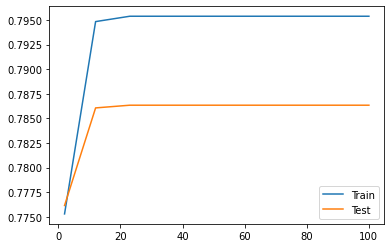

In [231]:
draw_learning_curve(param_values)

max_depth = 23

## Randomized CV

In [200]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 5)]
boosting_type = ['gbdt','dart','rf']
max_depth = [int(x)for x in np.linspace(2,50,5)]
num_leaves = [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)]

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

gb = lgb.LGBMClassifier(learning_rate = 0.1,n_jobs=-1)

gb_random = RandomizedSearchCV(estimator = gb, param_distributions = param_test, cv = 10, scoring='roc_auc',n_jobs=-1)
gb_random.fit(features_train, label_train)
print(gb_random.best_params_)

{'colsample_bytree': 0.6697448600819367, 'min_child_samples': 248, 'min_child_weight': 1, 'num_leaves': 43, 'reg_alpha': 2, 'reg_lambda': 5, 'subsample': 0.31403743849073323}


In [201]:
pred_train = gb_random.predict(features_train)
pred_test = gb_random.predict(features_test)
pred_proba = gb_random.predict_proba(features_test)[:,1]

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train),  gb_random.predict_proba(features_train)[:,1])
auc_train_gb_random = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test),  gb_random.predict_proba(features_test)[:,1])
auc_test_gb_random = metrics.auc(fpr,tpr)
auc_overfitting_gb_random = auc_test_gb_random-auc_train_gb_random
print('AUC test :',auc_test_gb_random*100,'%')
print('AUC train :',auc_train_gb_random*100,'%')

AUC test : 78.77445163109078 %
AUC train : 79.68583757460756 %


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_test ={'num_leaves': [43,50], 
             'min_child_samples': [248,300],
             'subsample': [0.3,0.4,0.5], 
             'colsample_bytree': [0.6,0.7,0.8]}

gb = lgb.LGBMClassifier(learning_rate = 0.1,n_jobs=-1)

gb_grid = GridSearchCV(estimator = gb, param_grid = param_test,cv=10,scoring='roc_auc',n_jobs=-1)
gb_grid.fit(features_train, label_train)
print(gb_grid.best_params_)

In [ ]:
pred_train = gb_grid.predict(features_train)
pred_test = gb_grid.predict(features_test)
pred_proba = gb_grid.predict_proba(features_test)[:,1]

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train),  gb_grid.predict_proba(features_train)[:,1])
auc_train_gb_grid = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test),  gb_grid.predict_proba(features_test)[:,1])
auc_test_gb_grid = metrics.auc(fpr,tpr)
auc_overfitting_gb_grid = auc_test_gb_grid-auc_train_gb_grid
print('AUC :',auc_test_gb_grid*100,'%')
print('AUC overfitting :',auc_train_gb_grid*100,'%')

# Feature Importance

In [299]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(colsample_bytree= 0.6697448600819367, min_child_samples= 248, min_child_weight= 1, num_leaves= 43, reg_alpha= 2, reg_lambda= 5, subsample= 0.31403743849073323)

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_lgb = accuracy_score(pred_train,label_train)
accuracy_test_lgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lgb = precision_score(pred_train,label_train)
precision_test_lgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lgb = recall_score(pred_train,label_train)
recall_test_lgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lgb = f1_score(pred_train,label_train)
f1_test_lgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lgb = metrics.auc(fpr,tpr)
auc_overfitting_lgb = auc_test_lgb-auc_train_lgb

print('accuracy model :',accuracy_test_lgb*100,'%')
print('AUC test :',auc_test_lgb*100,'%')
print('AUC train :',auc_train_lgb*100,'%' )

accuracy model : 88.5406475017864 %
AUC test : 78.77445163109078 %
AUC train : 79.68583757460756 %


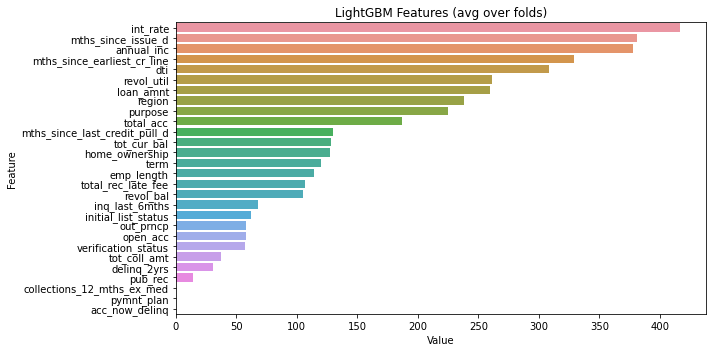

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X.columns)), columns=['Value','Feature'])
feature_imp = feature_imp.sort_values(by="Value",ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [289]:
column_important = feature_imp['Feature'].tolist() 

param value: 1; train: 0.6587609156972253; test: 0.6546334674336035
param value: 2; train: 0.6747968169558881; test: 0.6736903949999296
param value: 3; train: 0.6839044968419931; test: 0.6821770581321633
param value: 4; train: 0.6900074437042344; test: 0.6836318971983288
param value: 5; train: 0.694033527107541; test: 0.6862716229645118
param value: 6; train: 0.6971484279829846; test: 0.6865034837367734
param value: 7; train: 0.7014716094843981; test: 0.6886042554452836
param value: 8; train: 0.702114426788531; test: 0.6890878753942095
param value: 9; train: 0.7053091354313045; test: 0.6916627124255621
param value: 10; train: 0.7062882061447961; test: 0.6913150810589601
param value: 11; train: 0.7294977865156721; test: 0.7164743936470919
param value: 12; train: 0.7301664831722778; test: 0.7168912944664181
param value: 13; train: 0.7315690363526934; test: 0.7176505062202767
param value: 14; train: 0.7325586539083718; test: 0.7194816895648763
param value: 15; train: 0.7339069058933583; t

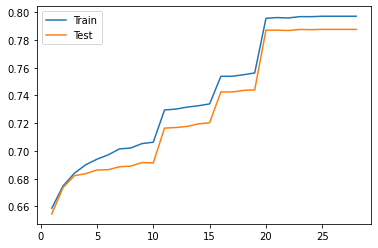

In [298]:

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    train_scores = []
    test_scores = []
    param_values = [int(x)for x in np.linspace(1,28,28)]
    for c in param_values:
        X_train_feature_importances = X_train[column_important]
        X_test_feature_importances = X_test[column_important]
        features_train_importances = X_train_feature_importances
        features_test_importances = X_test_feature_importances
        column = column_important[:c]
        X_train_1 = features_train_importances[column]
        X_test_1 =  features_test_importances[column]
        model = lgb.LGBMClassifier(colsample_bytree= 0.6697448600819367, min_child_samples= 248, min_child_weight= 1, num_leaves= 43, reg_alpha= 2, reg_lambda= 5, subsample= 0.31403743849073323)
        model.fit(X_train_1, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train_1)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test_1)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)
        
        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))
        
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()

# Credit Scoring

In [255]:
from collections import OrderedDict
import pandas as pd
import sys
%matplotlib inline
    
def plot_pandas_style(styler):
    from IPython.core.display import HTML
    html = '\n'.join([line.lstrip() for line in styler.render().split('\n')])
    return HTML(html)

def highlight_max(s,color='yellow'):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: {}'.format(color) if v else '' for v in is_max]

def decile_labels(agg1,label,color='skyblue'):
    agg_dummy = pd.DataFrame(OrderedDict((('TOTAL',0),('TARGET',0),('NONTARGET',0),('PCT_TAR',0),('CUM_TAR',0),('CUM_NONTAR',0),('DIST_TAR',0),('DIST_NONTAR',0),('SPREAD',0))),index=[0])
    agg1 = agg1.append(agg_dummy).sort_index()
    agg1.index.name = label
    agg1 = agg1.style.apply(highlight_max, color = 'yellow', subset=['SPREAD'])
    agg1.bar(subset=['TARGET'], color='{}'.format(color))
    agg1.bar(subset=['TOTAL'], color='{}'.format(color))
    agg1.bar(subset=['PCT_TAR'], color='{}'.format(color))
    return(agg1)

def deciling(data,decile_by,target,nontarget):
    inputs = list(decile_by)
    inputs.extend((target,nontarget))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['TOTAL'] = grouped.sum()[nontarget] + grouped.sum()[target]
    agg1['TARGET'] = grouped.sum()[target]
    agg1['NONTARGET'] = grouped.sum()[nontarget]
    agg1['PCT_TAR'] = grouped.mean()[target]*100
    agg1['CUM_TAR'] = grouped.sum()[target].cumsum()
    agg1['CUM_NONTAR'] = grouped.sum()[nontarget].cumsum()
    agg1['DIST_TAR'] = agg1['CUM_TAR']/agg1['TARGET'].sum()*100
    agg1['DIST_NONTAR'] = agg1['CUM_NONTAR']/agg1['NONTARGET'].sum()*100
    agg1['SPREAD'] = (agg1['DIST_TAR'] - agg1['DIST_NONTAR'])
    agg1 = decile_labels(agg1,'DECILE',color='skyblue')
    return(plot_pandas_style(agg1))

In [256]:
def scoring(features,clf,target):
    score = pd.DataFrame(clf.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    score['TARGET'] = target
    score['NONTARGET'] = 1 - target
    return(score)

In [476]:
scores_train = scoring(features_train,clf,label_train)
scores_test = scoring(features_test,clf,label_test)

In [477]:
scores_train

,SCORE,DECILE,TARGET,NONTARGET
0,0.23,9.00,0,1
1,0.60,4.00,0,1
2,0.38,7.00,0,1
3,0.64,4.00,1,0
4,0.51,5.00,0,1
...,...,...,...,...
641819,0.80,1.00,1,0
641820,0.83,1.00,1,0
641821,0.81,1.00,1,0
641822,0.83,1.00,1,0


In [258]:
df_test = scores_test.dropna()
df_test.to_excel('score_test.xlsx')

In [478]:
deciling(scores_train,['DECILE'],'TARGET','NONTARGET')

,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,SPREAD
DECILE,,,,,,,,,
0.0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000
1.0,64183,56446,7737,87.945406,56446,7737,17.589246,2.410941,15.178304
2.0,64182,50259,13923,78.307002,106705,21660,33.250548,6.749514,26.501035
3.0,64182,45564,18618,70.991867,152269,40278,47.448833,12.551104,34.897729
4.0,64183,40580,23603,63.225465,192849,63881,60.094044,19.906080,40.187964
5.0,64182,34516,29666,53.778318,227365,93547,70.849641,29.150359,41.699282
6.0,64182,28061,36121,43.720981,255426,129668,79.593783,40.406093,39.187690
7.0,64183,23407,40776,36.469158,278833,170444,86.887683,53.112380,33.775303
8.0,64182,19123,45059,29.794958,297956,215503,92.846637,67.153301,25.693336


In [271]:
df_test_score = df_test[['SCORE','DECILE']]

In [357]:
scores_test[(scores_test['DECILE']==9)&(score_test['DECILE']==10)]

NameError: name 'score_test' is not defined

In [272]:
df_test_score

,SCORE,DECILE
1,0.07,6.00
8,0.11,4.00
11,0.13,4.00
23,0.10,5.00
39,0.03,10.00
...,...,...
90939,0.06,7.00
90940,0.08,6.00
90948,0.09,5.00
90952,0.09,5.00


## Gain and Lift Chart

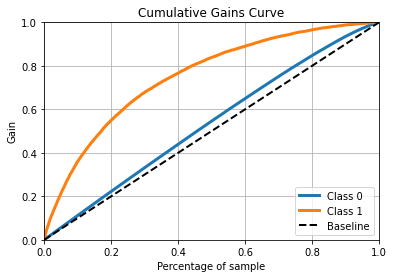

In [262]:
import scikitplot as skplt
probas = clf.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test,y_probas =probas)
plt.show()

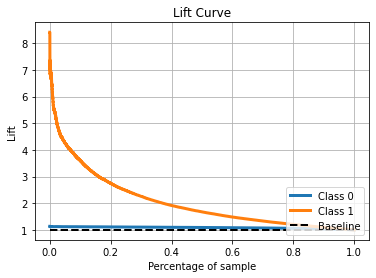

In [263]:
#Lift Chart
skplt.metrics.plot_lift_curve(y_test,y_probas =probas)
plt.show()

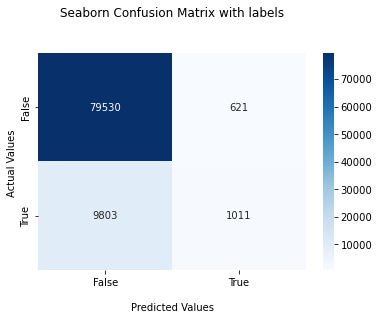

In [317]:
y_pred = clf.predict(features_test)
from sklearn.metrics import confusion_matrix
ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues',
                fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
#ROC Curve
#define metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

In [355]:
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt

def plots(agg1,target,type):

    plt.figure(1,figsize=(20, 5))

    plt.subplot(131)
    plt.plot(agg1['DECILE'],agg1['ACTUAL'],label='Actual')
    plt.plot(agg1['DECILE'],agg1['PRED'],label='Pred')
    plt.xticks(range(10,110,10))
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.title('Actual vs Predicted', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + " " + str(type) + " %",fontsize=15)

    plt.subplot(132)
    X = agg1['DECILE'].tolist()
    X.append(0)
    Y = agg1['DIST_TAR'].tolist()
    Y.append(0)
    plt.plot(sorted(X),sorted(Y))
    plt.plot([0, 100], [0, 100],'r--')
    plt.xticks(range(0,110,10))
    plt.yticks(range(0,110,10))
    plt.grid(True)
    plt.title('Gains Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + str(" DISTRIBUTION") + " %",fontsize=15)
    plt.annotate(round(agg1[agg1['DECILE'] == 30].DIST_TAR.item(),2),xy=[30,30], 
            xytext=(25, agg1[agg1['DECILE'] == 30].DIST_TAR.item() + 5),fontsize = 13)
    plt.annotate(round(agg1[agg1['DECILE'] == 50].DIST_TAR.item(),2),xy=[50,50], 
            xytext=(45, agg1[agg1['DECILE'] == 50].DIST_TAR.item() + 5),fontsize = 13)

    plt.subplot(133)
    plt.plot(agg1['DECILE'],agg1['LIFT'])
    plt.xticks(range(10,110,10))
    plt.grid(True)
    plt.title('Lift Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel("Lift",fontsize=15)

    plt.tight_layout()

In [356]:
def gains(data,decile_by,target,score):
    inputs = list(decile_by)
    inputs.extend((target,score))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['ACTUAL'] = grouped.mean()[target]*100
    agg1['PRED'] = grouped.mean()[score]*100
    agg1['DIST_TAR'] = grouped.sum()[target].cumsum()/grouped.sum()[target].sum()*100
    agg1.index.name = 'DECILE'
    agg1 = agg1.reset_index()
    agg1['DECILE'] = agg1['DECILE']*10
    agg1['LIFT'] = agg1['DIST_TAR']/agg1['DECILE']
    plots(agg1,target,'Distribution')

In [357]:
lift_train = pd.concat([features_train,scores_train],axis=1)
lift_test = pd.concat([features_test,scores_test],axis=1)

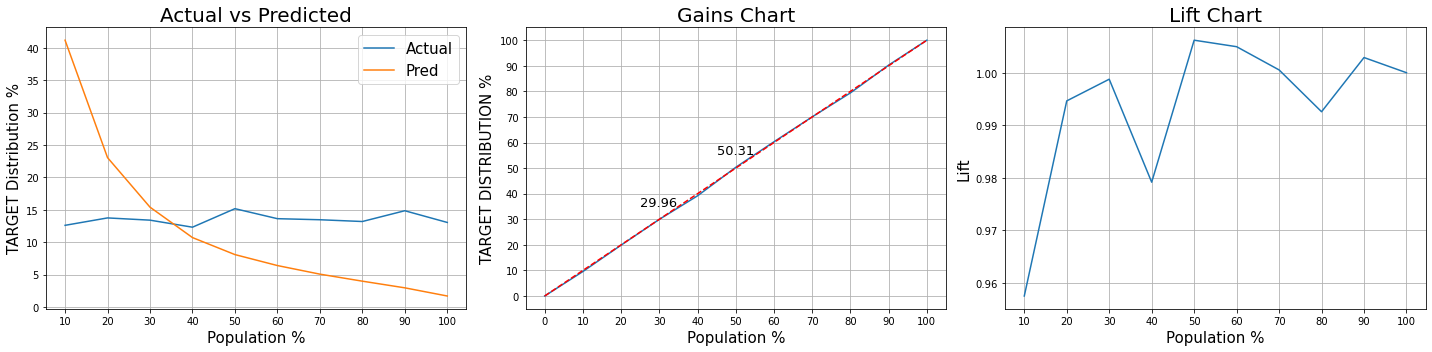

In [358]:
gains(lift_test,['DECILE'],'TARGET','SCORE')

## Impact of Model

In [348]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(colsample_bytree= 0.6697448600819367, min_child_samples= 248, min_child_weight= 1, num_leaves= 43, reg_alpha= 2, reg_lambda= 5, subsample= 0.31403743849073323)

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_lgb = accuracy_score(pred_train,label_train)
accuracy_test_lgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lgb = precision_score(pred_train,label_train)
precision_test_lgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lgb = recall_score(pred_train,label_train)
recall_test_lgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lgb = f1_score(pred_train,label_train)
f1_test_lgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lgb = metrics.auc(fpr,tpr)
auc_overfitting_lgb = auc_test_lgb-auc_train_lgb

print('accuracy model :',accuracy_test_lgb*100,'%')
print('AUC test :',auc_test_lgb*100,'%')
print('AUC train :',auc_train_lgb*100,'%' )

accuracy model : 88.5406475017864 %
AUC test : 78.77445163109078 %
AUC train : 79.68583757460756 %


In [311]:
X = df.drop('target',axis=1)
y = df['target']
from sklearn.model_selection import train_test_split
X_train_impact, X_test_impact, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=21)

In [313]:
X_test_impact['y_test'] = y_test

In [315]:
X_test_impact['y_pred'] = pred_test

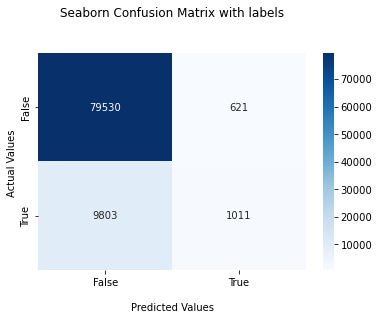

In [318]:
y_pred = clf.predict(features_test)
from sklearn.metrics import confusion_matrix
ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues',
                fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
#ROC Curve
#define metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

In [319]:
X_test.shape

(90965, 28)

In [330]:
total_model = X_test_impact[(X_test_impact['y_pred']==0)|(X_test_impact['y_pred']==1)]
total_model

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,region,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_credit_pull_d,y_test,y_pred
11463,8000,36,16.49,0.00,RENT,65004.00,Verified,n,other,17.22,0.00,2.00,5.00,0.00,1910,36.70,6.00,f,0.00,0.00,0.00,0.00,0.00,0.00,W,118.00,77.00,23.00,0,0
175081,35000,60,21.00,10.00,MORTGAGE,200000.00,Verified,n,debt_consolidation,16.73,0.00,3.00,11.00,0.00,15175,82.90,31.00,w,18438.72,0.00,0.00,0.00,0.00,356807.00,SE,288.00,60.00,23.00,0,0
47272,21000,36,7.90,10.00,RENT,60000.00,Verified,n,credit_card,17.43,2.00,1.00,18.00,0.00,18664,31.90,30.00,w,6950.38,0.00,0.00,0.00,0.00,38478.00,SW,501.00,48.00,23.00,0,0
409985,1800,36,11.99,3.00,OWN,52000.00,Not Verified,n,credit_card,15.79,4.00,2.00,9.00,1.00,3964,35.60,15.00,w,828.80,0.00,0.00,0.00,0.00,30501.00,NE,218.00,44.00,23.00,0,0
414398,30000,36,17.57,6.00,MORTGAGE,140000.00,Verified,n,credit_card,19.60,0.00,2.00,13.00,0.00,47043,82.50,28.00,f,14424.58,0.00,0.00,0.00,0.00,436150.00,SW,144.00,44.00,23.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393224,3500,36,14.16,0.00,RENT,39000.00,Verified,n,debt_consolidation,14.49,1.00,1.00,8.00,0.00,3534,90.60,26.00,f,1741.38,0.00,0.00,0.00,73.00,80220.00,SW,271.00,43.00,23.00,0,0
382185,10000,36,11.67,4.00,MORTGAGE,60000.00,Verified,n,home_improvement,19.86,0.00,0.00,7.00,1.00,8847,57.40,20.00,f,5156.68,0.00,0.00,0.00,0.00,28920.00,SE,435.00,43.00,23.00,0,0
373909,8200,36,14.99,2.00,RENT,38474.00,Verified,n,debt_consolidation,8.80,0.00,1.00,17.00,1.00,3484,45.80,38.00,w,0.00,0.00,0.00,0.00,0.00,55065.00,SW,355.00,42.00,23.00,0,0
387835,19500,60,19.52,2.00,RENT,66000.00,Verified,n,debt_consolidation,30.78,1.00,0.00,12.00,0.00,11054,82.50,47.00,f,15215.93,0.00,0.00,0.00,0.00,76612.00,SW,183.00,43.00,23.00,0,0


In [456]:
import xgboost as xgb
clf = xgb.XGBClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_xgb = accuracy_score(pred_train,label_train)
accuracy_test_xgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_xgb = precision_score(pred_train,label_train)
precision_test_xgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_xgb = recall_score(pred_train,label_train)
recall_test_xgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_xgb = f1_score(pred_train,label_train)
f1_test_xgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_xgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_xgb = metrics.auc(fpr,tpr)
auc_overfitting_xgb = auc_test_xgb-auc_train_xgb

print('accuracy model :',accuracy_test_xgb*100,'%')
print('AUC :',auc_test_xgb*100,'%')
print('AUC overfitting :',auc_overfitting_xgb*100,'%' )

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:home_ownership, initial_list_status, purpose, pymnt_plan, region, verification_status

In [322]:
total_sampel = 90965
total_model = 89333
total_default_sampel = 10814
total_default_model = 9803
default_percentage_sampel = total_default_sampel/total_sampel
default_percentage_sampel

0.11888088825372396

In [323]:
default_percentage_model = total_default_model/total_model
default_percentage_model

0.10973548408762719

In [359]:
total_pinjaman_sampel = 1305328925
total_kerugian = 159610575
total_pinjaman_model = 1278214675
total_kerugian_model = 142721975

In [341]:
X_test_impact[(X_test_impact['y_pred']==0)]['loan_amnt'].sum()

142721975

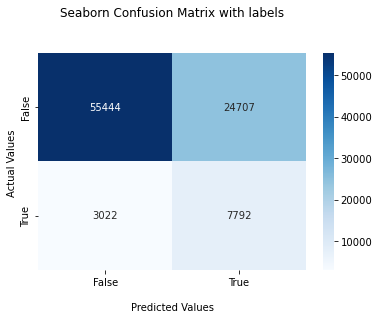

In [475]:
y_pred = clf.predict(features_test)
from sklearn.metrics import confusion_matrix
ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues',
                fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
#ROC Curve
#define metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

In [358]:
accuracy_test_xgb

0.8852085967130215

In [ ]:
X_test